# HumanEval+

In [43]:
samples = [
    "humaneval/gpt-4_temp_0.0/eval_results.json",
    "humaneval/meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together_temp_0.8-sanitized/eval_results.json",
    'humaneval/gpt-4o_azure_temp_0.8-sanitized/eval_results.json',
    
    "humaneval/codegen-6b_temp_0.8/eval_results.json",
    "humaneval/vicuna-7b_temp_0.8/eval_results.json",
    "humaneval/codegen2-7b_temp_0.8/eval_results.json",

    "humaneval/codet5p-16b_temp_0.8/eval_results.json",
    "humaneval/code-llama-7b_temp_0.8/eval_results.json",
    "humaneval/starcoder_temp_0.8/eval_results.json",
    "humaneval/mistral-7b_temp_0.8/eval_results.json",
    "humaneval/code-llama-13b_temp_0.8/eval_results.json",

    "humaneval/command-r-plus_cohere_temp_0.8-sanitized/eval_results.json",
    "humaneval/command-r_cohere_temp_0.8-sanitized/eval_results.json",
    "humaneval/command_cohere_temp_0.8-sanitized/eval_results.json",
    "humaneval/command-light_cohere_temp_0.8-sanitized/eval_results.json",

    "humaneval/meta-llama--Meta-Llama-3.1-8B-Instruct_openai_temp_0.8-sanitized/eval_results.json",
    "humaneval/meta-llama--Meta-Llama-3.1-70B-Instruct_openai_temp_0.8-sanitized/eval_results.json",

    "humaneval/microsoft--Phi-3-mini-128k-instruct_openai_temp_0.8-sanitized/eval_results.json",
    "humaneval/microsoft--Phi-3-medium-128k-instruct_openai_temp_0.8-sanitized/eval_results.json"


]

In [44]:
import json
import pandas as pd
import numpy as np

data = []

for res_file in samples:
    print(res_file)
    with open(res_file, "r") as f:
        results = json.load(f)

    n_samples = len(results['eval'][list(results['eval'].keys())[0]])

    if n_samples < 2:
        print(f"Skipping {res_file} due to insufficient samples")
        continue

    for key in results['eval'].keys():

        n_samples = len(results['eval'][key])
        
        pass_plus = 0
        pass_base = 0
        pass_base_and_plus = 0
        for solution in results['eval'][key]:
            
            if solution['plus_status'] == 'pass':
                pass_plus += 1

            if solution['base_status'] == 'pass':
                pass_base += 1

            if solution['base_status'] == 'pass' and solution['plus_status'] == 'pass':
                pass_base_and_plus += 1

        if pass_base == 0:
            data.append({
                'model': res_file,
                'key': key,
                'n_samples': n_samples,
                'pass_plus': pass_plus,
                'pass_base': pass_base,
                'pass_plus_rate': pass_plus / n_samples,
                'pass_base_rate': pass_base / n_samples,
                'pass_plus_given_base': None,
                'pass_plus_and_base': pass_base_and_plus
            })
        else:
            data.append({
                'model': res_file,
                'key': key,
                'n_samples': n_samples,
                'pass_plus': pass_plus,
                'pass_base': pass_base,
                'pass_plus_rate': pass_plus / n_samples,
                'pass_base_rate': pass_base / n_samples,
                'pass_plus_given_base': pass_base_and_plus / pass_base,
                'pass_plus_and_base': pass_base_and_plus / n_samples
            })

df = pd.DataFrame(data)

df['pass_plus_given_base_worst'] = np.where(df['pass_plus_given_base'].isna(), 0, df['pass_plus_given_base'])
df['pass_plus_given_base_best'] = np.where(df['pass_plus_given_base'].isna(), 1, df['pass_plus_given_base'])


# filter tasks with FNs
fn = list(df[df.pass_plus_rate > df.pass_base_rate][['key', 'model']].key.unique())
df = df[~df['key'].isin(fn)]

# remove "humaneval/" from model names and "/eval_results.json"
df['model'] = df['model'].str.replace("humaneval/", "")
df['model'] = df['model'].str.replace("/eval_results.json", "")
df['model'] = df['model'].str.replace("_temp_0.8", "")
df['model'] = df['model'].str.replace("-sanitized", "")


print("Number of tasks:", df['key'].nunique())

humaneval/gpt-4_temp_0.0/eval_results.json
Skipping humaneval/gpt-4_temp_0.0/eval_results.json due to insufficient samples
humaneval/meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together_temp_0.8-sanitized/eval_results.json
humaneval/gpt-4o_azure_temp_0.8-sanitized/eval_results.json
humaneval/codegen-6b_temp_0.8/eval_results.json
humaneval/vicuna-7b_temp_0.8/eval_results.json
humaneval/codegen2-7b_temp_0.8/eval_results.json
humaneval/codet5p-16b_temp_0.8/eval_results.json
humaneval/code-llama-7b_temp_0.8/eval_results.json
humaneval/starcoder_temp_0.8/eval_results.json
humaneval/mistral-7b_temp_0.8/eval_results.json
humaneval/code-llama-13b_temp_0.8/eval_results.json
humaneval/command-r-plus_cohere_temp_0.8-sanitized/eval_results.json
Skipping humaneval/command-r-plus_cohere_temp_0.8-sanitized/eval_results.json due to insufficient samples
humaneval/command-r_cohere_temp_0.8-sanitized/eval_results.json
humaneval/command_cohere_temp_0.8-sanitized/eval_results.json
humaneval/command-ligh

## Task Difficulty Distributions

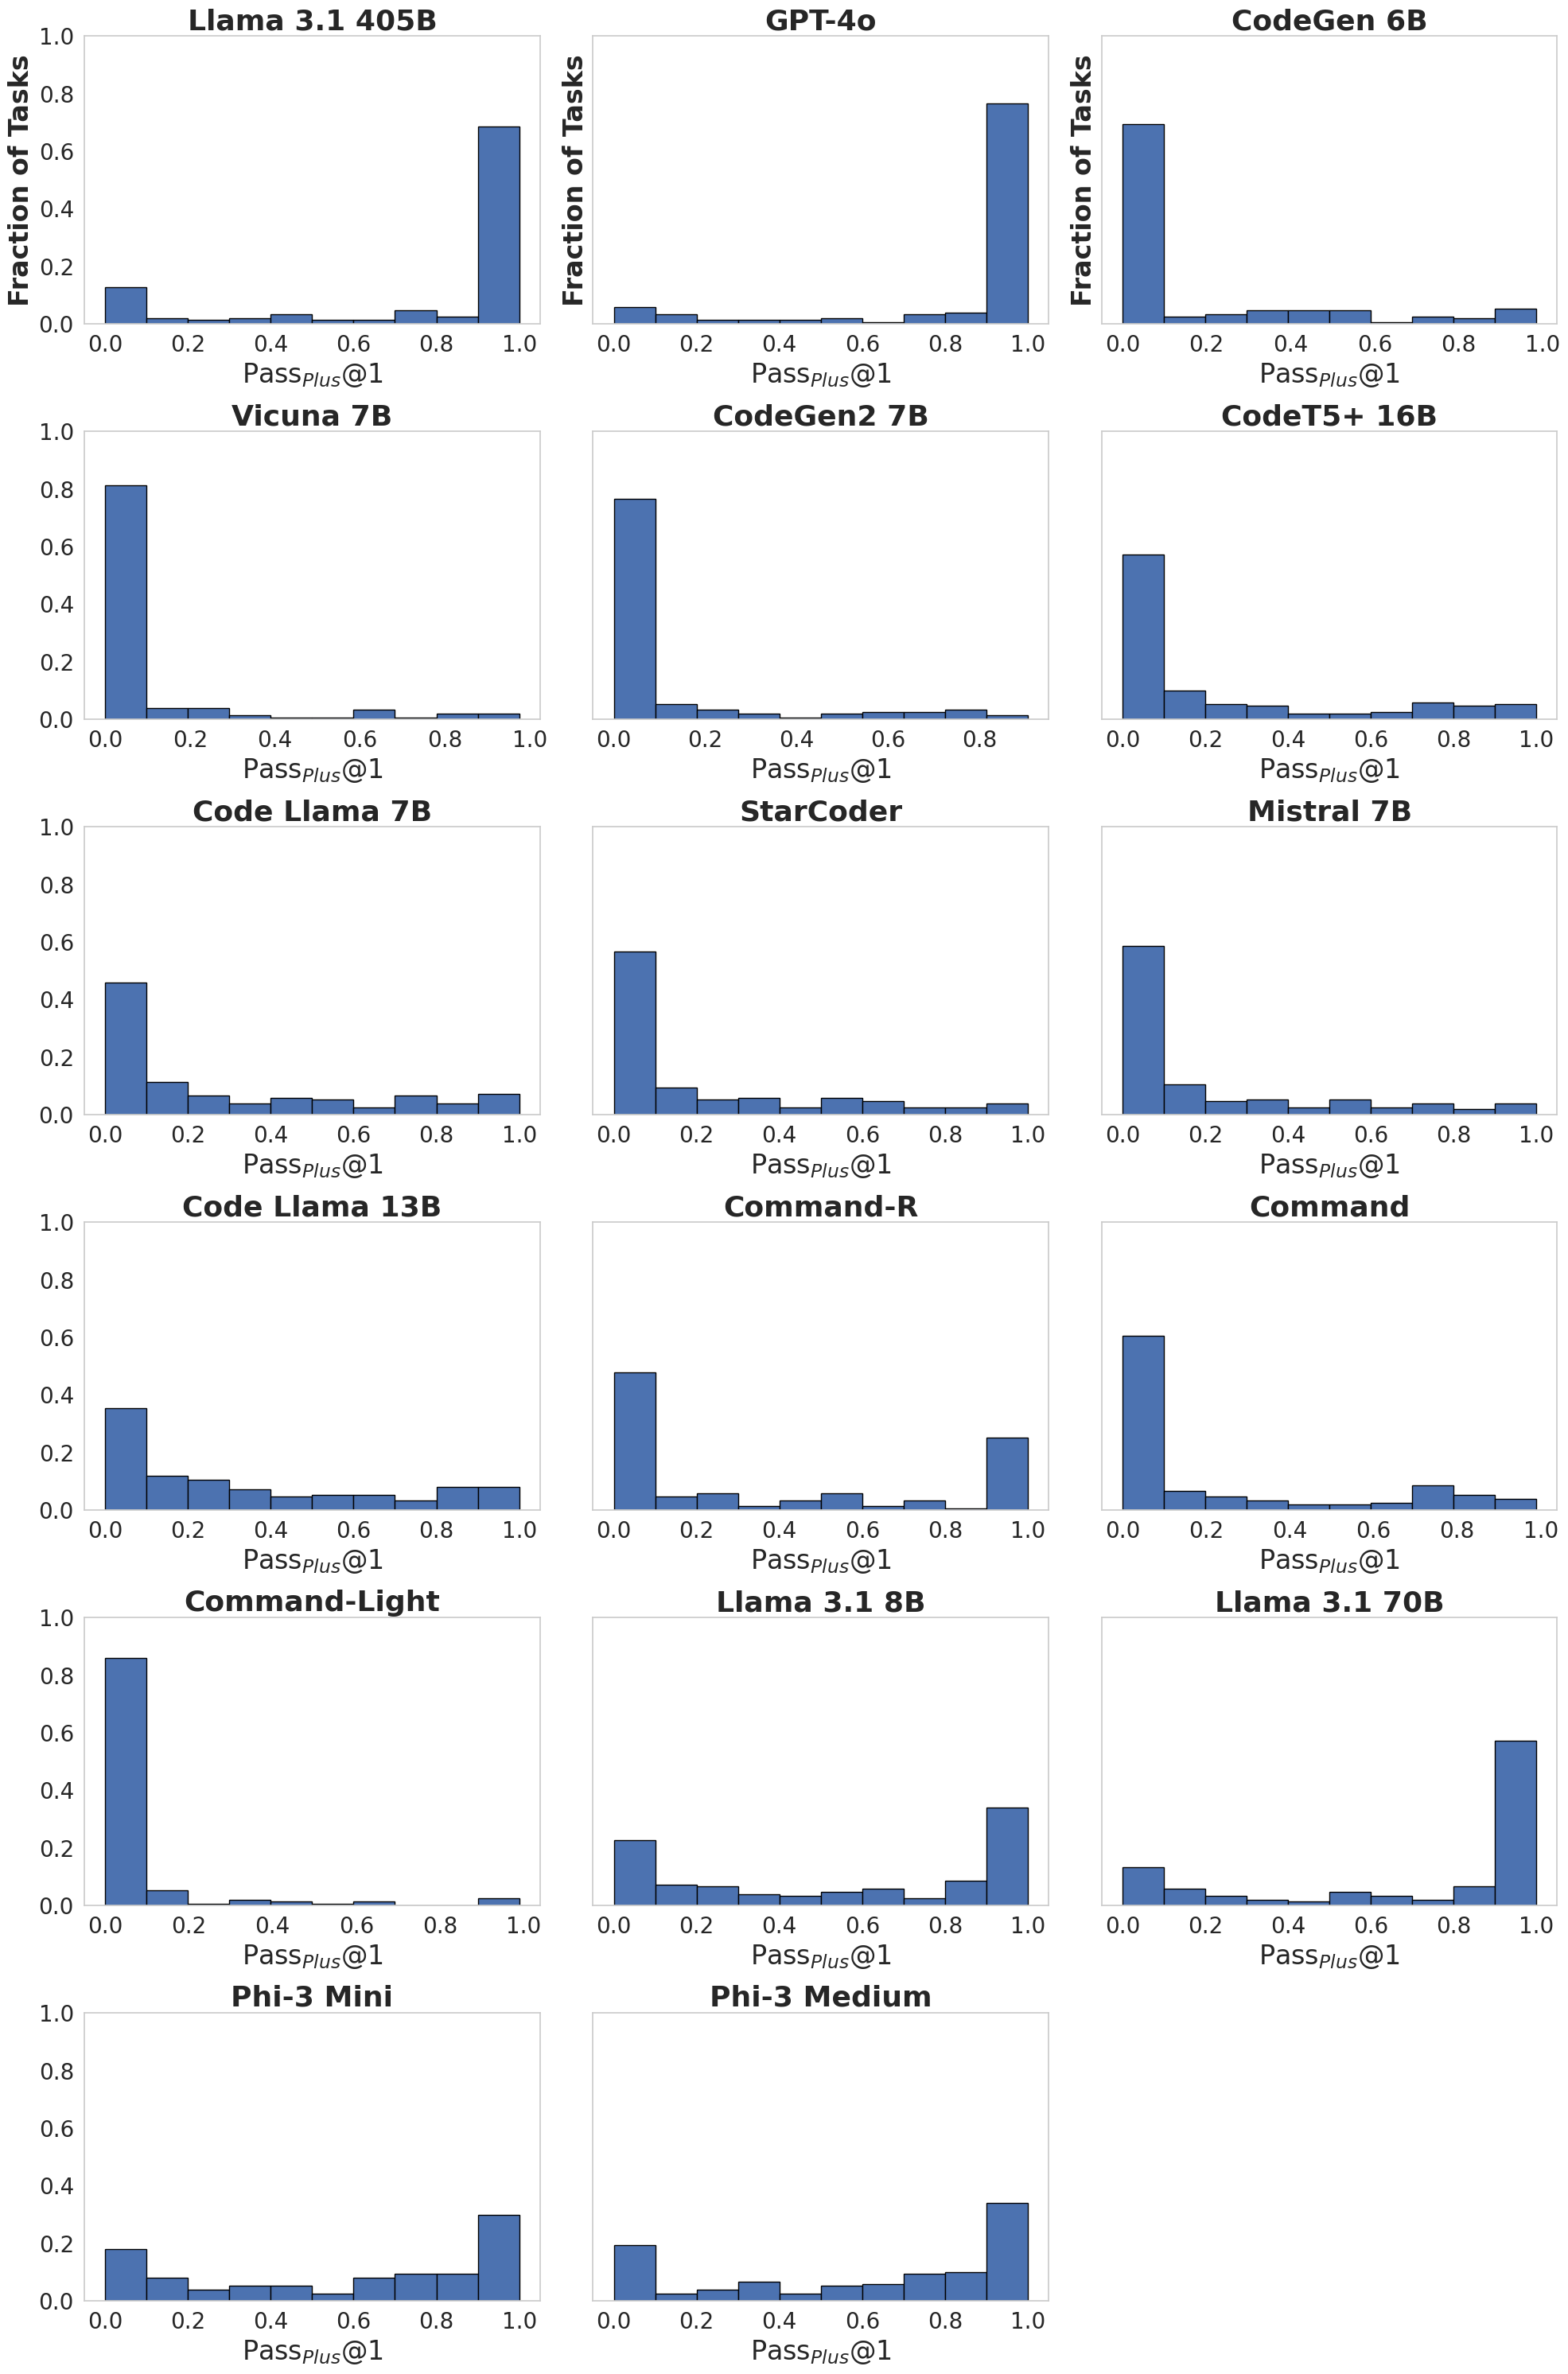

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Define the model name mapping to more readable titles
model_titles = {
    'codegen-6b': 'CodeGen 6B',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2 7B',
    'codet5p-16b': 'CodeT5+ 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

# Get the unique models from the dataframe
unique_models = df['model'].unique()

# Set up the grid size based on the number of models
n_cols = 3
n_rows = -(-len(unique_models) // n_cols)  # Ceiling division to determine rows needed

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30), sharey=True)
axes = axes.flatten()

# Loop through each model and create a histogram
for i, model in enumerate(unique_models):
    ax = axes[i]
    filtered_data = df[df['model'] == model]
    weights = [1 / len(filtered_data)] * len(filtered_data) # Equal weight for each task and sum to 1
    
    ax.hist(filtered_data['pass_plus_rate'], bins=10, weights=weights, edgecolor='black')
    ax.set_title(model_titles.get(model, model), fontsize=26, weight='bold')
    ax.set_xlabel(r'$\text{Pass}_{Plus}@1$', fontsize=24)
    ax.grid(False)
    ax.set_ylim(0, 1)
    
    # change font size of ticks
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the ylabel for the first column
for ax in axes[:n_cols]:
    ax.set_ylabel('Fraction of Tasks', fontsize=24, weight='bold')

# Hide any empty subplots
for j in range(len(unique_models), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('figs/diff_humaneval.png', dpi=300)
plt.show()


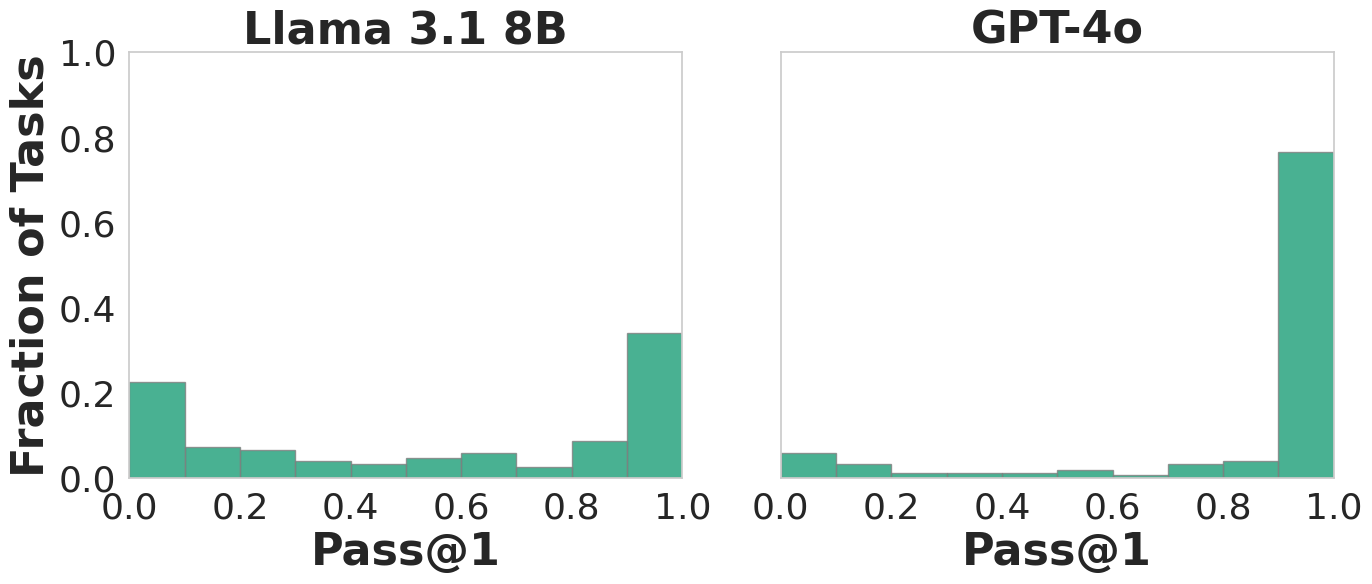

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style='whitegrid')
colors = sns.color_palette("Dark2", n_colors=len(unique_models))

# Define the model name mapping to more readable titles
model_titles = {
    'codegen-6b': 'CodeGen 6B',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2 7B',
    'codet5p-16b': 'CodeT5+ 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

# Define the models to plot
unique_models = ["meta-llama--Meta-Llama-3.1-8B-Instruct_openai", "gpt-4o_azure"]

# Set up the grid size based on the number of models
n_cols = 2
n_rows = 1

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharey=True)
axes = axes.flatten()

# Loop through each model and create a histogram
for i, model in enumerate(unique_models):
    ax = axes[i]
    filtered_data = df[df['model'] == model]
    weights = [1 / len(filtered_data)] * len(filtered_data)  # Equal weight for each task and sum to 1
    
    ax.hist(filtered_data['pass_plus_rate'], bins=10, weights=weights, 
            edgecolor='gray', color=colors[0], alpha=0.8)
    ax.set_title(model_titles.get(model, model), fontsize=32, weight='bold')
    ax.set_xlabel("Pass@1", fontsize=32, weight='bold')
    ax.grid(False)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    
    # Change font size of ticks
    ax.tick_params(axis='both', which='major', labelsize=26)

# Set the ylabel for the first column
axes[0].set_ylabel('Fraction of Tasks', fontsize=32, weight='bold')
# Hide any empty subplots
for j in range(len(unique_models), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
def calculate_model_params(df, model_name = "command-r_cohere"):
    filtered_data = df[df['model'] == model_name]
    weights = [1 / len(filtered_data)] * len(filtered_data) # Equal weight for each task and sum to 1

    df_high = filtered_data[filtered_data['pass_plus_rate'] > 0.5]
    df_low = filtered_data[filtered_data['pass_plus_rate'] <= 0.5]

    r_1 = df_high['pass_plus_rate'].mean()
    r_2 = df_low['pass_plus_rate'].mean()

    soundness = (1 - filtered_data['pass_base_rate'].mean() - filtered_data['pass_plus_rate'].mean() + filtered_data['pass_plus_given_base'].mean() * filtered_data['pass_base_rate'].mean())/(1 - filtered_data['pass_plus_rate'].mean())

    p_1 = len(df_high) / len(filtered_data)
    p_2 = len(df_low) / len(filtered_data)

    return {
        'r_1': r_1,
        'r_2': r_2,
        'soundness': soundness,
        'p_1': p_1,
        'p_2': p_2,
        'V_correct': 1
    }


unique_models = df['model'].unique()

# add model params as column for each model
model_params = {}
for model in unique_models:
    model_params[model] = calculate_model_params(df, model)



In [12]:
import numpy as np

def get_k_opt(model_params, V_fluke, k_max=800):
    """
    Returns the optimal number of attempts (k_opt) that maximizes the expected value
    for a given model and V_fluke penalty value.
    
    Args:
        model_params (dict): Dictionary containing the model parameters.
        V_fluke (float): Penalty value for a false positive.
        k_max (int): Maximum number of attempts to consider.
        
    Returns:
        int: Optimal number of attempts (k_opt).
    """

    # Unpack model parameters
    r_1 = model_params['r_1']
    r_2 = model_params['r_2']
    c = 1 # always 1 for unit tests
    s = model_params['soundness']
    p_1 = model_params['p_1']
    p_2 = model_params['p_2']
    V_correct = 1 # always 1 for reference
    
    beta_1 = (1 - c) * r_1 + s * (1 - r_1) # true probability that a given attempt will be a reject for easy task
    beta_2 = (1 - c) * r_2 + s * (1 - r_2) # for hard task
    
    p_correct_1 = c * r_1 # probability of a correct accept (easy task)
    p_correct_2 = c * r_2 # hard task

    p_fluke_1 = (1 - r_1) * (1 - s) # probability of a incorrect accept (easy task)
    p_fluke_2 = (1 - r_2) * (1 - s) # hard task
 
    def get_beliefs(k, beta_1, beta_2, p_1, p_2):
        """
        This compute the conditional probabilities that the given task is of type hard or easy given the number of attempts k.
        Inuition is that as we need more attempt to get a passing solution, the harder task (with lower probability to generate a correct solution) becomes more likely.
        """
        p_t1 = (beta_1**(k-1) * p_1)/(beta_1**(k-1) * p_1 + (beta_2**(k-1)) * p_2)
        p_t2 = (beta_2**(k-1) * p_2)/(beta_1**(k-1) * p_1 + (beta_2**(k-1)) * p_2)
        return p_t1, p_t2

    exp_vals_k = []
    exp_vals = []
    beliefs_T1 = []
    beliefs_T2 = []

    k_values = range(1, k_max + 1)

    exp_vals = []
    exp_vals_k = []
    
    for k in k_values:
        p_t1, p_t2 = get_beliefs(k, beta_1, beta_2, p_1, p_2)
        
        exp_val = (V_correct * (p_correct_1 * p_t1 + p_correct_2 * p_t2) + V_fluke * (p_fluke_1 * p_t1 + p_fluke_2 * p_t2)) * (beta_1**(k-1) * p_t1 + beta_2**(k-1) * p_t2)
        exp_vals_k.append(exp_val)
        
        exp_vals.append(sum(exp_vals_k[:k]))
    
    k_opt = k_values[np.argmax(exp_vals)]
    if exp_vals[k_opt-1] < 0:
        k_opt = 0
    
    return k_opt


Text(216.25, 0.5, '')

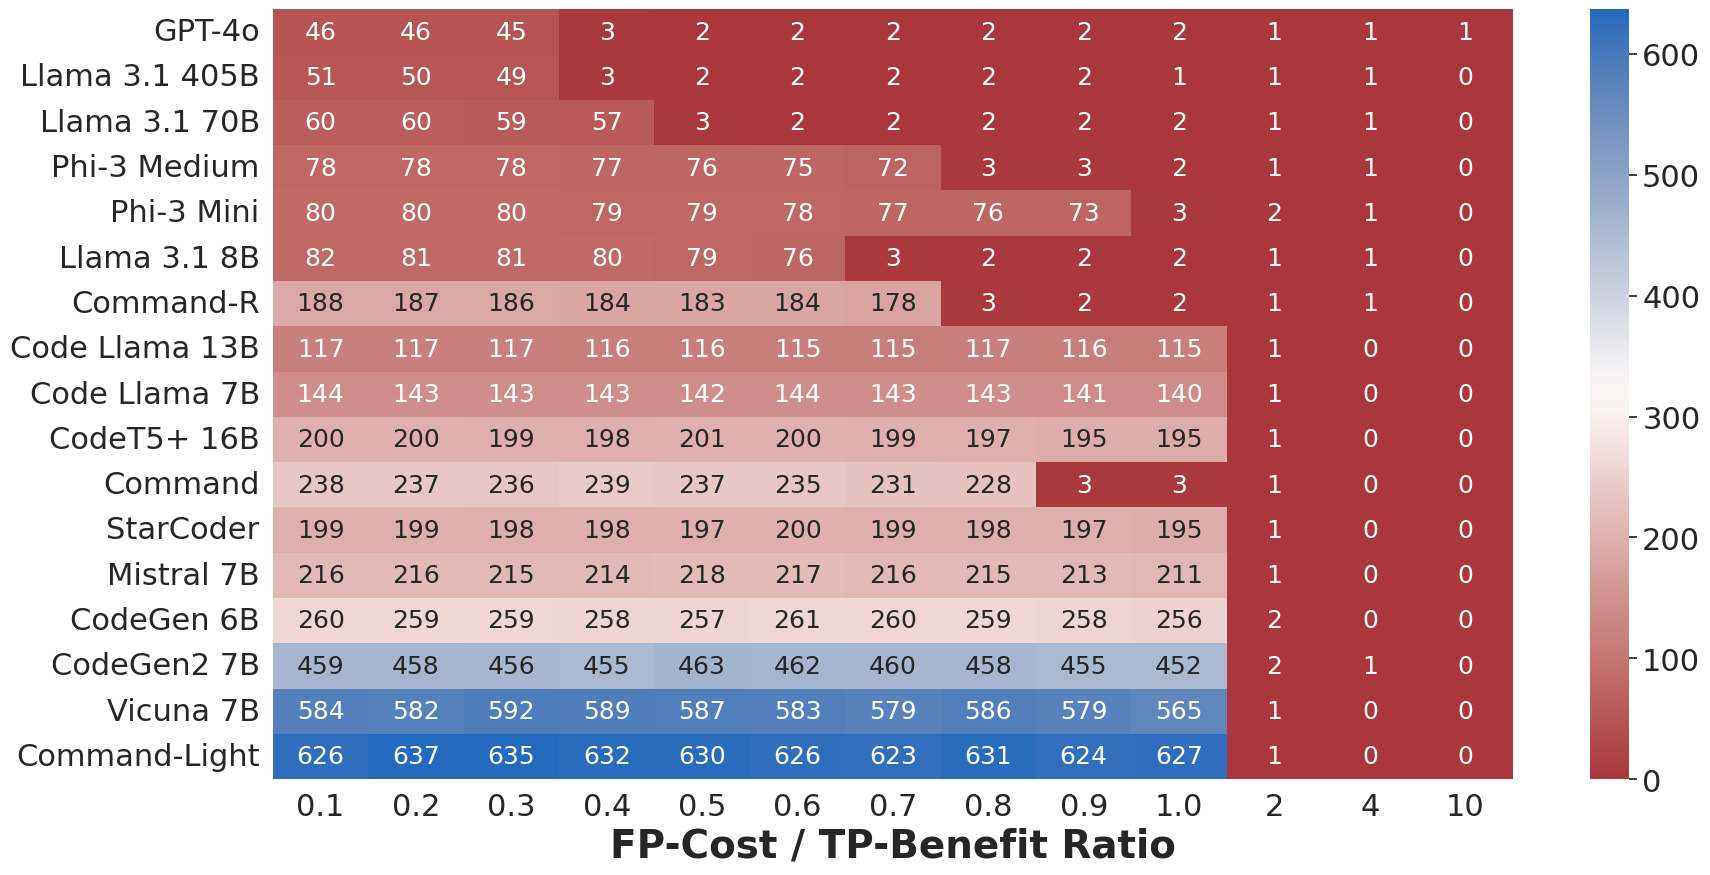

In [27]:
# for each row in df add three columns k_opt_1, k_opt_2, k_opt_3 for each model
V_fluke_values = [-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0, -2, -4, -10]


df_heatmap = df.drop(columns='key').groupby('model').mean().sort_values('pass_plus_rate', ascending=False).reset_index()


for V_fluke in V_fluke_values:
    df_heatmap[f'k_opt_{abs(V_fluke)}'] = df_heatmap['model'].apply(lambda x: get_k_opt(model_params[x], V_fluke))


# Define the model name mapping to more readable titles
model_titles = {
    'codegen-6b': 'CodeGen 6B',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2 7B',
    'codet5p-16b': 'CodeT5+ 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

df_heatmap['model'] = df_heatmap['model'].apply(lambda x: model_titles.get(x, x))


# plot heatmap of k_opt for each model and V_fluke value
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Set style and color palette
sns.set(style='whitegrid')
colors = sns.color_palette("vlag", as_cmap=True)
colors = colors.reversed()

# plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_heatmap.set_index('model')[[f'k_opt_{abs(V_fluke)}' for V_fluke in V_fluke_values]].drop_duplicates(), cmap=colors, ax=ax, annot=True, fmt=".0f")

# replace 'k_opt_' in all x-tick labels
labels = [item.get_text().replace('k_opt_', '') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, fontsize=22)

# increase font size of y-tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)

# increase font size of scale
for t in ax.texts: t.set_fontsize(18)

# incrase font size of legend
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)

ax.set_xlabel("FP-Cost / TP-Benefit Ratio", fontsize=28, weight='bold')
ax.set_ylabel("", fontsize=28, weight='bold')

beta_1: 0.09483333289790283
beta_2: 0.647699729670425
p_correct_1: 0.8738248665464701
p_correct_2: 0.13823971665148135
p_fluke_1: 0.031341800555627096
p_fluke_2: 0.2140605536780936



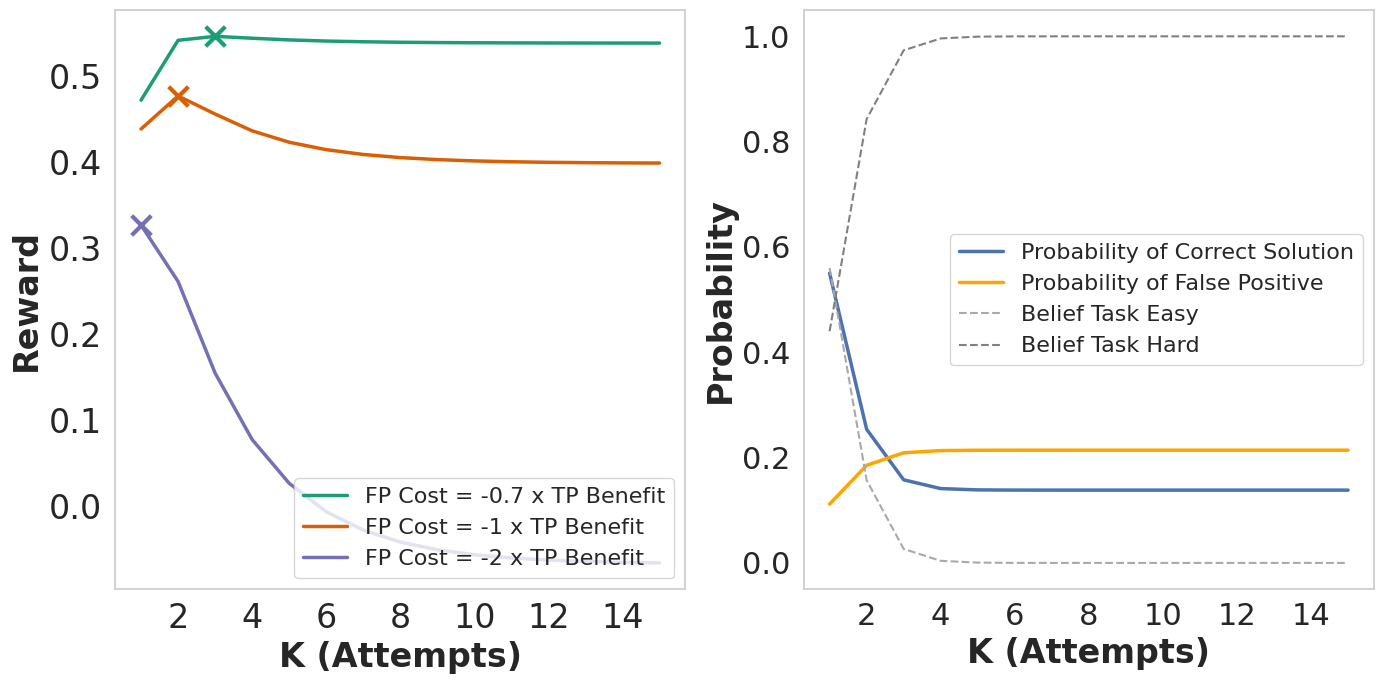

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


MODEL_NAME = 'meta-llama--Meta-Llama-3.1-8B-Instruct_openai'

sns.set_style("whitegrid")


r_1 = model_params[MODEL_NAME]['r_1']
r_2 = model_params[MODEL_NAME]['r_2']

c = 1 # always 1 for unit tests
s = model_params[MODEL_NAME]['soundness']

p_1 = model_params[MODEL_NAME]['p_1']
p_2 = model_params[MODEL_NAME]['p_2']

beta_1 = (1 - c) * r_1 + s * (1 - r_1) # true probability that a given attempt will be a reject for easy task
beta_2 = (1 - c) * r_2 + s * (1 - r_2) # for hard task

# Values
V_correct = 1
V_fluke_values = [-0.7, -1, -2]  # Various V_fluke penalty values

# Computational cost (set to 0)
C_k = 0

p_correct_1 = c * r_1 # probability of a correct accept (easy task)
p_correct_2 = c * r_2 # hard task

p_fluke_1 = (1 - r_1) * (1 - s) # probability of a incorrect accept (easy task)
p_fluke_2 = (1 - r_2) * (1 - s) # hard task

def get_beliefs(k, beta_1, beta_2, p_1, p_2):
  """
  This compute the conditional probabilities that the given task is of type hard or easy given the number of attempts k.
  Inuition is that as we need more attempt to get a passing solution, the harder task (with lower probability to generate a correct solution) becomes more likely.
  """
  p_t1 = (beta_1**(k-1) * p_1)/(beta_1**(k-1) * p_1 + (beta_2**(k-1)) * p_2)
  p_t2 = (beta_2**(k-1) * p_2)/(beta_1**(k-1) * p_1 + (beta_2**(k-1)) * p_2)
  return p_t1, p_t2

exp_vals_k = []
exp_vals = []
beliefs_T1 = []
beliefs_T2 = []

k_values = range(1, 16)

sns.set_style("whitegrid")
colors = sns.color_palette("Dark2", len(V_fluke_values))

plt.figure(figsize=(14, 7))

# Expected Value for different V_fluke values
plt.subplot(1, 2, 1)

for i, V_fluke in enumerate(V_fluke_values):
    exp_vals = []
    exp_vals_k = []
    
    for k in k_values:
        p_t1, p_t2 = get_beliefs(k, beta_1, beta_2, p_1, p_2)
        
        exp_val = (V_correct * (p_correct_1 * p_t1 + p_correct_2 * p_t2) + V_fluke * (p_fluke_1 * p_t1 + p_fluke_2 * p_t2)) * (beta_1**(k-1) * p_t1 + beta_2**(k-1) * p_t2)
        exp_vals_k.append(exp_val)
        
        exp_vals.append(sum(exp_vals_k[:k]))
    
    k_opt = k_values[np.argmax(exp_vals)]
    if exp_vals[k_opt-1] < 0:
        k_opt = 0

    plt.plot(k_values, exp_vals, label=f'FP Cost = {V_fluke} x TP Benefit', color=colors[i], linewidth=2.5)
    
    plt.scatter(k_opt, exp_vals[k_opt-1],
                color=colors[i], s=200, marker='x', linewidth=3)


plt.xlabel('K (Attempts)', fontsize=24, weight='bold')
plt.ylabel('Reward', fontsize=24, weight='bold')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, loc="lower right")
plt.grid()

# Probabilities (for the last V_fluke value, to avoid duplication)
p_correct = []
p_fluke = []
beliefs_T1 = []
beliefs_T2 = []

for k in k_values:
    p_t1, p_t2 = get_beliefs(k, beta_1, beta_2, p_1, p_2)
    p_correct.append(p_correct_1 * p_t1 + p_correct_2 * p_t2)
    p_fluke.append(p_fluke_1 * p_t1 + p_fluke_2 * p_t2)
    beliefs_T1.append(p_t1)
    beliefs_T2.append(p_t2)

# Plot probabilities
plt.subplot(1, 2, 2)
plt.plot(k_values, p_correct, label='Probability of Correct Solution', color='b', linewidth=2.5)
plt.plot(k_values, p_fluke, label='Probability of False Positive', color='orange', linewidth=2.5)
plt.plot(k_values, beliefs_T1, label='Belief Task Easy', color='darkgrey', linestyle='--')
plt.plot(k_values, beliefs_T2, label='Belief Task Hard', color='grey', linestyle='--')
plt.xlabel('K (Attempts)', fontsize=24, weight='bold')
plt.ylabel('Probability', fontsize=24, weight='bold')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=16)
plt.grid()

plt.tight_layout()
plt.show()

## Scatterplots

/tmp/ipykernel_3434135/3163683259.py:63: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',


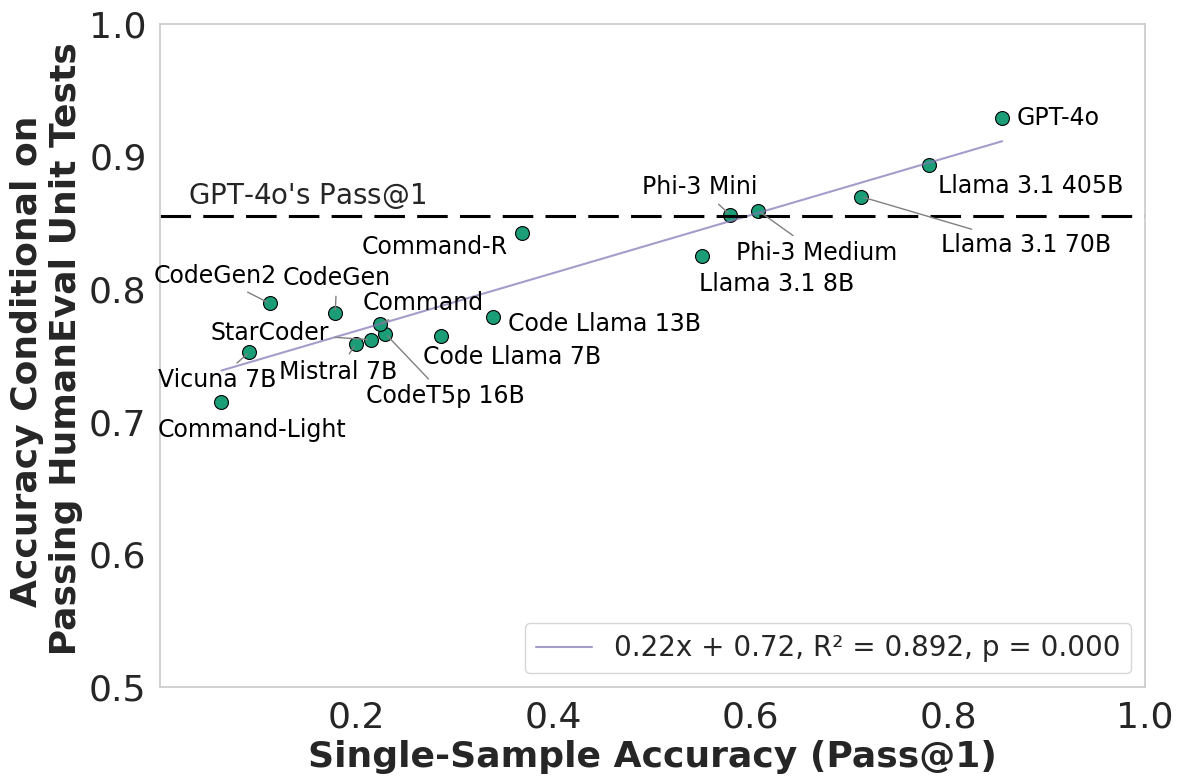

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# drop column key
df_grouped = df.drop(columns=['key'])

df_grouped = df_grouped.groupby('model').mean().reset_index()

# Create a new column for color coding
# df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'Llama 70B' if 'Meta-Llama-3.1-70B' in x else 'Others')
df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'GPT-4o' if 'gpt-4o_azure' in x else 'Others')


gpt_4o_rate = df_grouped[df_grouped['color_group'] == 'GPT-4o']['pass_plus_rate'].values[0]



model_name_mapping = {
    'codegen-6b': 'CodeGen',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2',
    'codet5p-16b': 'CodeT5p 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

# Apply the mapping to the model column
df_grouped['model'] = df_grouped['model'].map(model_name_mapping)

# Fit power law and linear models
popt_linear, _ = curve_fit(lambda x, m, b: m*x + b, df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Generate points for the fitted curves
x_fit = np.linspace(df_grouped['pass_plus_rate'].min(), df_grouped['pass_plus_rate'].max(), 100)
y_fit_linear = popt_linear[0] * x_fit + popt_linear[1]

# Calculate R-squared values
r2_linear = r2_score(df_grouped['pass_plus_given_base'], popt_linear[0] * df_grouped['pass_plus_rate'] + popt_linear[1])

# Perform linear regression to get the p-value
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Set the Seaborn style and Dark2 color palette
sns.set(style="whitegrid", palette="Dark2")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',
                           palette="Dark2", s=100, edgecolor='black', legend='full')

# Add the linear fit line
plt.plot(x_fit, y_fit_linear, 'm-', label=f'{popt_linear[0]:.2f}x + {popt_linear[1]:.2f}, R² = {r2_linear:.3f}, p = {p_value:.3f}', alpha=0.7, linewidth=1.5)

plt.ylim(0, 1)
plt.xlim(.001, 1)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Add horizontal line for GPT-4o pass_plus_rate
plt.axhline(y=gpt_4o_rate, linestyle='dashed', linewidth=2.2, dashes=(10, 4), alpha=1, color='black')
plt.text(0.03, gpt_4o_rate+0.015, r"GPT-4o's $\text{Pass}@1$", 
         verticalalignment='center', fontsize=20)


# Add annotations to each point (optional, may clutter the plot if too many points)
for i in range(len(df_grouped)):
    model = df_grouped.iloc[i]['model']
    pass_plus_rate = df_grouped.iloc[i]['pass_plus_rate']
    pass_plus_given_base = df_grouped.iloc[i]['pass_plus_given_base']
    line = False
    if model == 'CodeGen2':
        xytext = (5, 20)
        line = True
    elif model == 'CodeGen':
        xytext = (40, 25)
        line = True
    elif model == 'Command':
        xytext = (75, 15)
        line = True
    elif model == 'Command-Light':
        xytext = (90, -20)
        line = False
    elif model == 'Code Llama 13B':
        xytext = (150, -5)
        line = False
    elif model == 'Code Llama 7B':
        xytext = (115, -15)
        line = False
    elif model == 'CodeT5p 16B':
        xytext = (100, -45)
        line = True
    elif model == 'StarCoder':
        xytext = (-30, 5)
        line = True
    elif model == 'Mistral 7B':
        xytext = (30, -20)
        line = True
    elif model == 'Phi-3 Medium':
        xytext = (100, -30)
        line = True
    elif model == 'Phi-3 Mini':
        xytext = (20, 20)
        line = True
    elif model == 'Llama 3.1 8B':
        xytext = (110, -20)
        line = False
    elif model == 'Llama 3.1 70B':
        xytext = (180, -35)
        line = True
    elif model == 'Llama 3.1 405B':
        xytext = (140, -15)
        line = False
    elif model == 'Vicuna 7B':
        xytext = (20, -20)
        line = True
    elif model == 'Command-R':
        xytext = (-10, -10)
        line = False
    else:
        xytext = (70, 0)
        line = False
    if line:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray'))
    else:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray', alpha=0.))
        

# Customize the legend
plt.legend(loc='lower right', fontsize=20)
plt.grid(False)
plt.ylim(0.5, 1)

# Add labels and title
plt.xlabel('Single-Sample Accuracy (Pass@1)', fontsize=26, weight='bold')
plt.ylabel("Accuracy Conditional on \n Passing HumanEval Unit Tests", fontsize=26, weight='bold')


# Adjust the layout to make it more professional
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('humaneval.png', dpi=300)

# Show the plot
plt.show()

/tmp/ipykernel_3434135/3284139175.py:63: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',


Code Llama 13B 0.33876666666666666 0.7791487886071686
Code Llama 7B 0.2862 0.7645359573675352
CodeGen 0.17886666666666665 0.7819456443409677
CodeGen2 0.11246666666666667 0.7891557294937201
CodeT5p 16B 0.2298 0.766251445414787
Command-Light 0.06352666666666666 0.7147691421376404
Command-R 0.36806666666666665 0.8424025349731507
Command 0.22383333333333336 0.7735327278226033
GPT-4o 0.855 0.9288279561535917
Llama 3.1 405B 0.7809333333333334 0.8932684346620694
Llama 3.1 70B 0.7121 0.8695344754631117
Llama 3.1 8B 0.5501674005926751 0.8246222663512303
Phi-3 Medium 0.6078666666666667 0.8588798027866777
Phi-3 Mini 0.5790964162411865 0.8558553329291604
Mistral 7B 0.19953333333333334 0.7587162798367411
StarCoder 0.2147666666666667 0.7617543937389855
Vicuna 7B 0.0915 0.7522914627882045


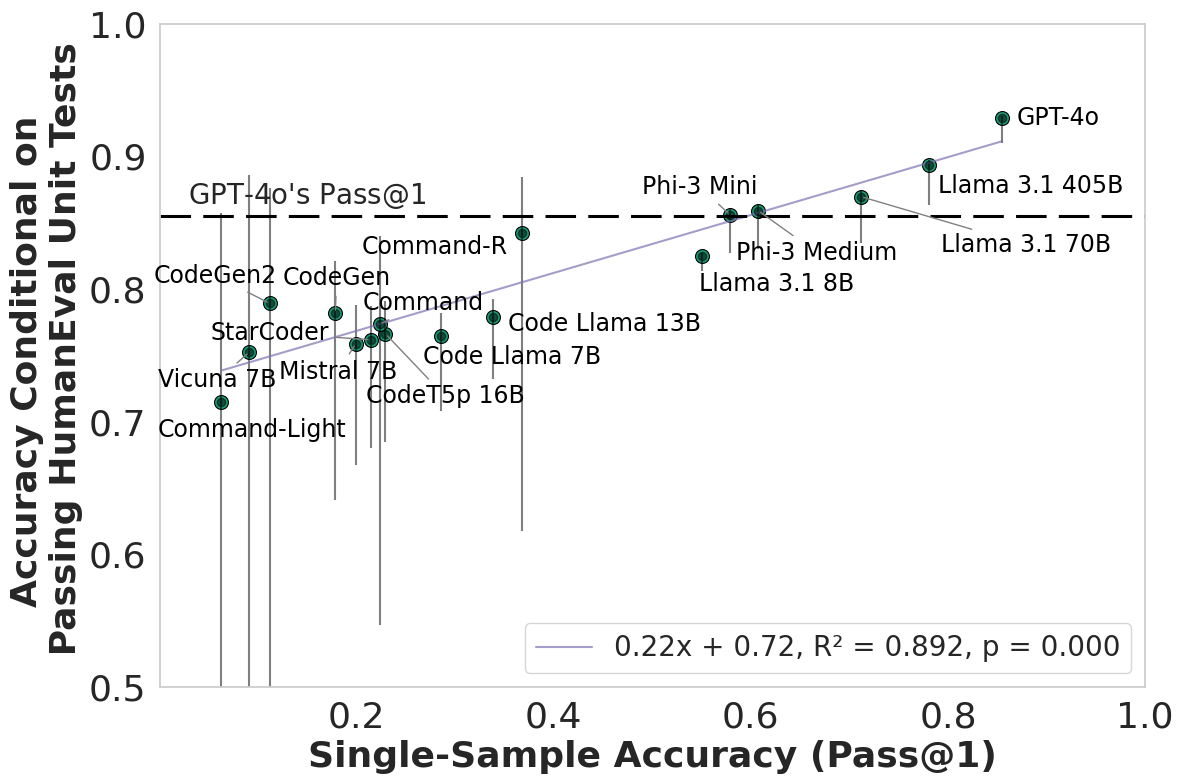

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# drop column key
df_grouped = df.drop(columns=['key'])

df_grouped = df_grouped.groupby('model').mean().reset_index()

# Create a new column for color coding
# df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'Llama 70B' if 'Meta-Llama-3.1-70B' in x else 'Others')
df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'GPT-4o' if 'gpt-4o_azure' in x else 'Others')


gpt_4o_rate = df_grouped[df_grouped['color_group'] == 'GPT-4o']['pass_plus_rate'].values[0]



model_name_mapping = {
    'codegen-6b': 'CodeGen',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2',
    'codet5p-16b': 'CodeT5p 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

# Apply the mapping to the model column
df_grouped['model'] = df_grouped['model'].map(model_name_mapping)

# Fit power law and linear models
popt_linear, _ = curve_fit(lambda x, m, b: m*x + b, df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Generate points for the fitted curves
x_fit = np.linspace(df_grouped['pass_plus_rate'].min(), df_grouped['pass_plus_rate'].max(), 100)
y_fit_linear = popt_linear[0] * x_fit + popt_linear[1]

# Calculate R-squared values
r2_linear = r2_score(df_grouped['pass_plus_given_base'], popt_linear[0] * df_grouped['pass_plus_rate'] + popt_linear[1])

# Perform linear regression to get the p-value
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Set the Seaborn style and Dark2 color palette
sns.set(style="whitegrid", palette="Dark2")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',
                           palette="Dark2", s=100, edgecolor='black', legend='full')

# add error bars
plt.errorbar(df_grouped['pass_plus_rate'], 
             df_grouped['pass_plus_given_base'], 
             yerr=[df_grouped['pass_plus_given_base'] - df_grouped['pass_plus_given_base_worst'], df_grouped['pass_plus_given_base_best'] - df_grouped['pass_plus_given_base']], 
             fmt='o', color='black', alpha=0.5)

# Add the linear fit line
plt.plot(x_fit, y_fit_linear, 'm-', label=f'{popt_linear[0]:.2f}x + {popt_linear[1]:.2f}, R² = {r2_linear:.3f}, p = {p_value:.3f}', alpha=0.7, linewidth=1.5)

plt.ylim(0, 1)
plt.xlim(.001, 1)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Add horizontal line for GPT-4o pass_plus_rate
plt.axhline(y=gpt_4o_rate, linestyle='dashed', linewidth=2.2, dashes=(10, 4), alpha=1, color='black')
plt.text(0.03, gpt_4o_rate+0.015, r"GPT-4o's $\text{Pass}@1$", 
         verticalalignment='center', fontsize=20)

# Add annotations to each point (optional, may clutter the plot if too many points)
for i in range(len(df_grouped)):
    model = df_grouped.iloc[i]['model']
    pass_plus_rate = df_grouped.iloc[i]['pass_plus_rate']
    pass_plus_given_base = df_grouped.iloc[i]['pass_plus_given_base']
    line = False
    if model == 'CodeGen2':
        xytext = (5, 20)
        line = True
    elif model == 'CodeGen':
        xytext = (40, 25)
        line = True
    elif model == 'Command':
        xytext = (75, 15)
        line = True
    elif model == 'Command-Light':
        xytext = (90, -20)
        line = False
    elif model == 'Code Llama 13B':
        xytext = (150, -5)
        line = False
    elif model == 'Code Llama 7B':
        xytext = (115, -15)
        line = False
    elif model == 'CodeT5p 16B':
        xytext = (100, -45)
        line = True
    elif model == 'StarCoder':
        xytext = (-30, 5)
        line = True
    elif model == 'Mistral 7B':
        xytext = (30, -20)
        line = True
    elif model == 'Phi-3 Medium':
        xytext = (100, -30)
        line = True
    elif model == 'Phi-3 Mini':
        xytext = (20, 20)
        line = True
    elif model == 'Llama 3.1 8B':
        xytext = (110, -20)
        line = False
    elif model == 'Llama 3.1 70B':
        xytext = (180, -35)
        line = True
    elif model == 'Llama 3.1 405B':
        xytext = (140, -15)
        line = False
    elif model == 'Vicuna 7B':
        xytext = (20, -20)
        line = True
    elif model == 'Command-R':
        xytext = (-10, -10)
        line = False
    else:
        xytext = (70, 0)
        line = False
    if line:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray'))
    else:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray', alpha=0.))
        

# Customize the legend
plt.legend(loc='lower right', fontsize=20)
plt.grid(False)
plt.ylim(0.5, 1)

# Add labels and title
plt.xlabel('Single-Sample Accuracy (Pass@1)', fontsize=26, weight='bold')
plt.ylabel("Accuracy Conditional on \n Passing HumanEval Unit Tests", fontsize=26, weight='bold')


# Adjust the layout to make it more professional
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('humaneval_err_bars.png', dpi=300)

# Show the plot
plt.show()

/tmp/ipykernel_3434135/3059970868.py:68: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',


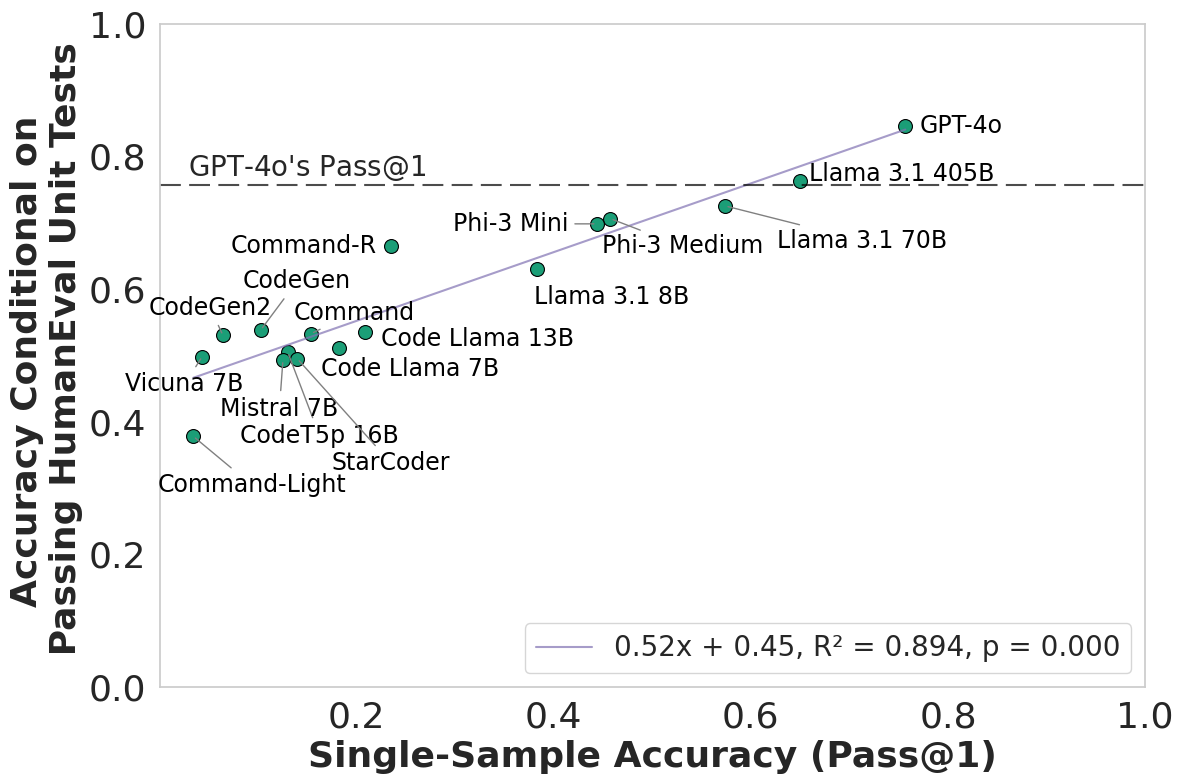

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

df_temp = df.drop(columns=['model']).groupby('key').mean().reset_index()

top_tasks = df_temp[(df_temp['pass_plus_given_base']>=0) & (df_temp['pass_plus_given_base']<0.9)].sort_values('pass_plus_given_base', ascending=True).key.tolist()

df_grouped = df[df['key'].isin(top_tasks)]

# drop column key
df_grouped = df_grouped.drop(columns=['key'])

df_grouped = df_grouped.groupby('model').mean().reset_index()

# Create a new column for color coding
df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'GPT-4o' if 'gpt-4o_azure' in x else 'Others')


gpt_4o_rate = df_grouped[df_grouped['color_group'] == 'GPT-4o']['pass_plus_rate'].values[0]



model_name_mapping = {
    'codegen-6b': 'CodeGen',
    'vicuna-7b': 'Vicuna 7B',
    'codegen2-7b': 'CodeGen2',
    'codet5p-16b': 'CodeT5p 16B',
    'code-llama-7b': 'Code Llama 7B',
    'starcoder': 'StarCoder',
    'mistral-7b': 'Mistral 7B',
    'code-llama-13b': 'Code Llama 13B',
    'command-r_cohere': 'Command-R',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'meta-llama--Meta-Llama-3.1-8B-Instruct_openai': 'Llama 3.1 8B',
    'meta-llama--Meta-Llama-3.1-70B-Instruct_openai': 'Llama 3.1 70B',
    'microsoft--Phi-3-mini-128k-instruct_openai': 'Phi-3 Mini',
    'microsoft--Phi-3-medium-128k-instruct_openai': 'Phi-3 Medium',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'gpt-4o_azure': 'GPT-4o'
}

# Apply the mapping to the model column
df_grouped['model'] = df_grouped['model'].map(model_name_mapping)

# Fit power law and linear models
popt_linear, _ = curve_fit(lambda x, m, b: m*x + b, df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Generate points for the fitted curves
x_fit = np.linspace(df_grouped['pass_plus_rate'].min(), df_grouped['pass_plus_rate'].max(), 100)
y_fit_linear = popt_linear[0] * x_fit + popt_linear[1]

# Calculate R-squared values
r2_linear = r2_score(df_grouped['pass_plus_given_base'], popt_linear[0] * df_grouped['pass_plus_rate'] + popt_linear[1])

# Perform linear regression to get the p-value
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Set the Seaborn style and Dark2 color palette
sns.set(style="whitegrid", palette="Dark2")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',
                           palette="Dark2", s=100, edgecolor='black', legend='full')

# Add the linear fit line
plt.plot(x_fit, y_fit_linear, 'm-', label=f'{popt_linear[0]:.2f}x + {popt_linear[1]:.2f}, R² = {r2_linear:.3f}, p = {p_value:.3f}', alpha=0.7, linewidth=1.5)

plt.ylim(0, 1)
plt.xlim(.001, 1)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Add horizontal line for GPT-4o pass_plus_rate
plt.axhline(y=gpt_4o_rate, linestyle='dashed', linewidth=1.5, dashes=(10, 4), alpha=0.7, color='black')
plt.text(0.03, gpt_4o_rate+0.025, r"GPT-4o's $\text{Pass}@1$", 
         verticalalignment='center', fontsize=20)


# Add annotations to each point (optional, may clutter the plot if too many points)
for i in range(len(df_grouped)):
    model = df_grouped.iloc[i]['model']
    pass_plus_rate = df_grouped.iloc[i]['pass_plus_rate']
    pass_plus_given_base = df_grouped.iloc[i]['pass_plus_given_base']
    line = False
    if model == 'CodeGen2':
        xytext = (35, 20)
        line = True
    elif model == 'CodeGen':
        xytext = (65, 35)
        line = True
    elif model == 'Command':
        xytext = (75, 15)
        line = True
    elif model == 'Command-Light':
        xytext = (110, -35)
        line = True
    elif model == 'Code Llama 13B':
        xytext = (150, -5)
        line = False
    elif model == 'Code Llama 7B':
        xytext = (115, -15)
        line = False
    elif model == 'CodeT5p 16B':
        xytext = (80, -60)
        line = True
    elif model == 'StarCoder':
        xytext = (110, -75)
        line = True
    elif model == 'Mistral 7B':
        xytext = (40, -35)
        line = True
    elif model == 'Phi-3 Medium':
        xytext = (110, -20)
        line = True
    elif model == 'Phi-3 Mini':
        xytext = (-20, 0)
        line = True
    elif model == 'Llama 3.1 8B':
        xytext = (110, -20)
        line = False
    elif model == 'Llama 3.1 70B':
        xytext = (160, -25)
        line = True
    elif model == 'Llama 3.1 405B':
        xytext = (140, 5)
        line = False
    elif model == 'Vicuna 7B':
        xytext = (30, -20)
        line = True
    elif model == 'Command-R':
        xytext = (-10, 0)
        line = False
    else:
        xytext = (70, 0)
        line = False
    if line:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray'))
    else:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray', alpha=0.))
        

# Customize the legend
plt.legend(loc='lower right', fontsize=20)
plt.grid(False)
plt.ylim(0, 1)

# Add labels and title
plt.xlabel('Single-Sample Accuracy (Pass@1)', fontsize=26, weight='bold')
plt.ylabel("Accuracy Conditional on \n Passing HumanEval Unit Tests", fontsize=26, weight='bold')

# Adjust the layout to make it more professional
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('humaneval_full_axis.png', dpi=300)

# Show the plot
plt.show()

## Theoretical model

### Heatmap

### LLama 3.1 8B curves

# MBPP+

In [29]:
samples = [
    "mbpp/gpt-35-turbo-16k_azure_temp_0.8-sanitized/eval_results.json",
    "mbpp/gpt-4o_azure_temp_0.8-sanitized/eval_results.json",
    "mbpp/meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together_temp_0.8-sanitized/eval_results.json",
    "mbpp/Meta-Llama-3-1-8B-Instruct-nwxcg_azure_temp_0.8-sanitized/eval_results.json",
    "mbpp/Meta-Llama-3-1-70B-Instruct-htzs_azure_temp_0.8-sanitized/eval_results.json",
    "mbpp/Mistral-large-ygkys_azure_temp_0.8-sanitized/eval_results.json",
    "mbpp/Mistral-small-zgjes_azure_temp_0.8-sanitized/eval_results.json",
    "mbpp/command_cohere_temp_0.8-sanitized/eval_results.json",
    "mbpp/command-light_cohere_temp_0.8-sanitized/eval_results.json",
    "mbpp/command-r_cohere_temp_0.8-sanitized/eval_results.json"
]


excluded_by_evalplus_authors = ['Mbpp/783',
 'Mbpp/164',
 'Mbpp/438',
 'Mbpp/229',
 'Mbpp/431',
 'Mbpp/249',
 'Mbpp/574',
 'Mbpp/396',
 'Mbpp/295',
 'Mbpp/117',
 'Mbpp/746',
 'Mbpp/407',
 'Mbpp/595',
 'Mbpp/400',
 'Mbpp/115',
 'Mbpp/442',
 'Mbpp/582',
 'Mbpp/143',
 'Mbpp/640',
 'Mbpp/83',
 'Mbpp/461']


ids_solved_base_but_no_model_plus = ['Mbpp/593',
 'Mbpp/124',
 'Mbpp/102',
 'Mbpp/287',
 'Mbpp/305',
 'Mbpp/267',
 'Mbpp/113',
 'Mbpp/739',
 'Mbpp/310',
 'Mbpp/748',
 'Mbpp/639',
 'Mbpp/577',
 'Mbpp/255',
 'Mbpp/396',
 'Mbpp/630',
 'Mbpp/595',
 'Mbpp/765',
 'Mbpp/415',
 'Mbpp/126',
 'Mbpp/468',
 'Mbpp/769',
 'Mbpp/806',
 'Mbpp/771',
 'Mbpp/427',
 'Mbpp/462',
 'Mbpp/300',
 'Mbpp/589',
 'Mbpp/590',
 'Mbpp/438',
 'Mbpp/440',
 'Mbpp/430']

keys_to_exclude = list(set(excluded_by_evalplus_authors + ids_solved_base_but_no_model_plus))

len(keys_to_exclude)

 

49

In [30]:
import json

data = []

for res_file in samples:
    print(res_file)
    with open(res_file, "r") as f:
        results = json.load(f)

    # remove keys that are in the exclusion list
    for key in keys_to_exclude:
        if key in results['eval']:
            del results['eval'][key]

    n_samples = len(results['eval'][list(results['eval'].keys())[0]])

    for key in results['eval'].keys():
        n_samples = len(results['eval'][key])
        
        pass_plus = 0
        pass_base = 0
        pass_base_and_plus = 0
        pass_base_and_not_plus = 0
        for solution in results['eval'][key]:
            
            if solution['plus_status'] == 'pass':
                pass_plus += 1

            if solution['base_status'] == 'pass':
                pass_base += 1
                if not solution['plus_status'] == 'pass':
                    pass_base_and_not_plus += 1
            

            if solution['base_status'] == 'pass' and solution['plus_status'] == 'pass':
                pass_base_and_plus += 1
        
        if pass_base == 0:
            data.append({
                'model': res_file,
                'key': key,
                'n_samples': n_samples,
                'pass_plus': pass_plus,
                'pass_base': pass_base,
                'pass_plus_rate': pass_plus / n_samples,
                'pass_base_rate': pass_base / n_samples,
                'pass_plus_given_base': None,
                'pass_plus_and_base': pass_base_and_plus,
                'pass_base_and_not_plus_rate': pass_base_and_not_plus/ n_samples
            })
        else:
            data.append({
                'model': res_file,
                'key': key,
                'n_samples': n_samples,
                'pass_plus': pass_plus,
                'pass_base': pass_base,
                'pass_plus_rate': pass_plus / n_samples,
                'pass_base_rate': pass_base / n_samples,
                'pass_plus_given_base': pass_base_and_plus / pass_base,
                'pass_plus_and_base': pass_base_and_plus / n_samples,
                'pass_base_and_not_plus_rate': pass_base_and_not_plus/ n_samples
            })

import pandas as pd

df = pd.DataFrame(data)

df['pass_plus_given_base_worst'] = np.where(df['pass_plus_given_base'].isna(), 0, df['pass_plus_given_base'])
df['pass_plus_given_base_best'] = np.where(df['pass_plus_given_base'].isna(), 1, df['pass_plus_given_base'])

# filter tasks with FNs
fn = list(df[df.pass_plus_rate > df.pass_base_rate][['key', 'model']].key.unique())
df = df[~df['key'].isin(fn)]

df['model'] = df['model'].str.replace("mbpp/", "")
df['model'] = df['model'].str.replace("/eval_results.json", "")
df['model'] = df['model'].str.replace("_temp_0.8", "")
df['model'] = df['model'].str.replace("-sanitized", "")

print("Number of tasks:", df['key'].nunique())


mbpp/gpt-35-turbo-16k_azure_temp_0.8-sanitized/eval_results.json
mbpp/gpt-4o_azure_temp_0.8-sanitized/eval_results.json
mbpp/meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together_temp_0.8-sanitized/eval_results.json
mbpp/Meta-Llama-3-1-8B-Instruct-nwxcg_azure_temp_0.8-sanitized/eval_results.json
mbpp/Meta-Llama-3-1-70B-Instruct-htzs_azure_temp_0.8-sanitized/eval_results.json
mbpp/Mistral-large-ygkys_azure_temp_0.8-sanitized/eval_results.json
mbpp/Mistral-small-zgjes_azure_temp_0.8-sanitized/eval_results.json
mbpp/command_cohere_temp_0.8-sanitized/eval_results.json
mbpp/command-light_cohere_temp_0.8-sanitized/eval_results.json
mbpp/command-r_cohere_temp_0.8-sanitized/eval_results.json
Number of tasks: 321


## Task Difficulty Distributions

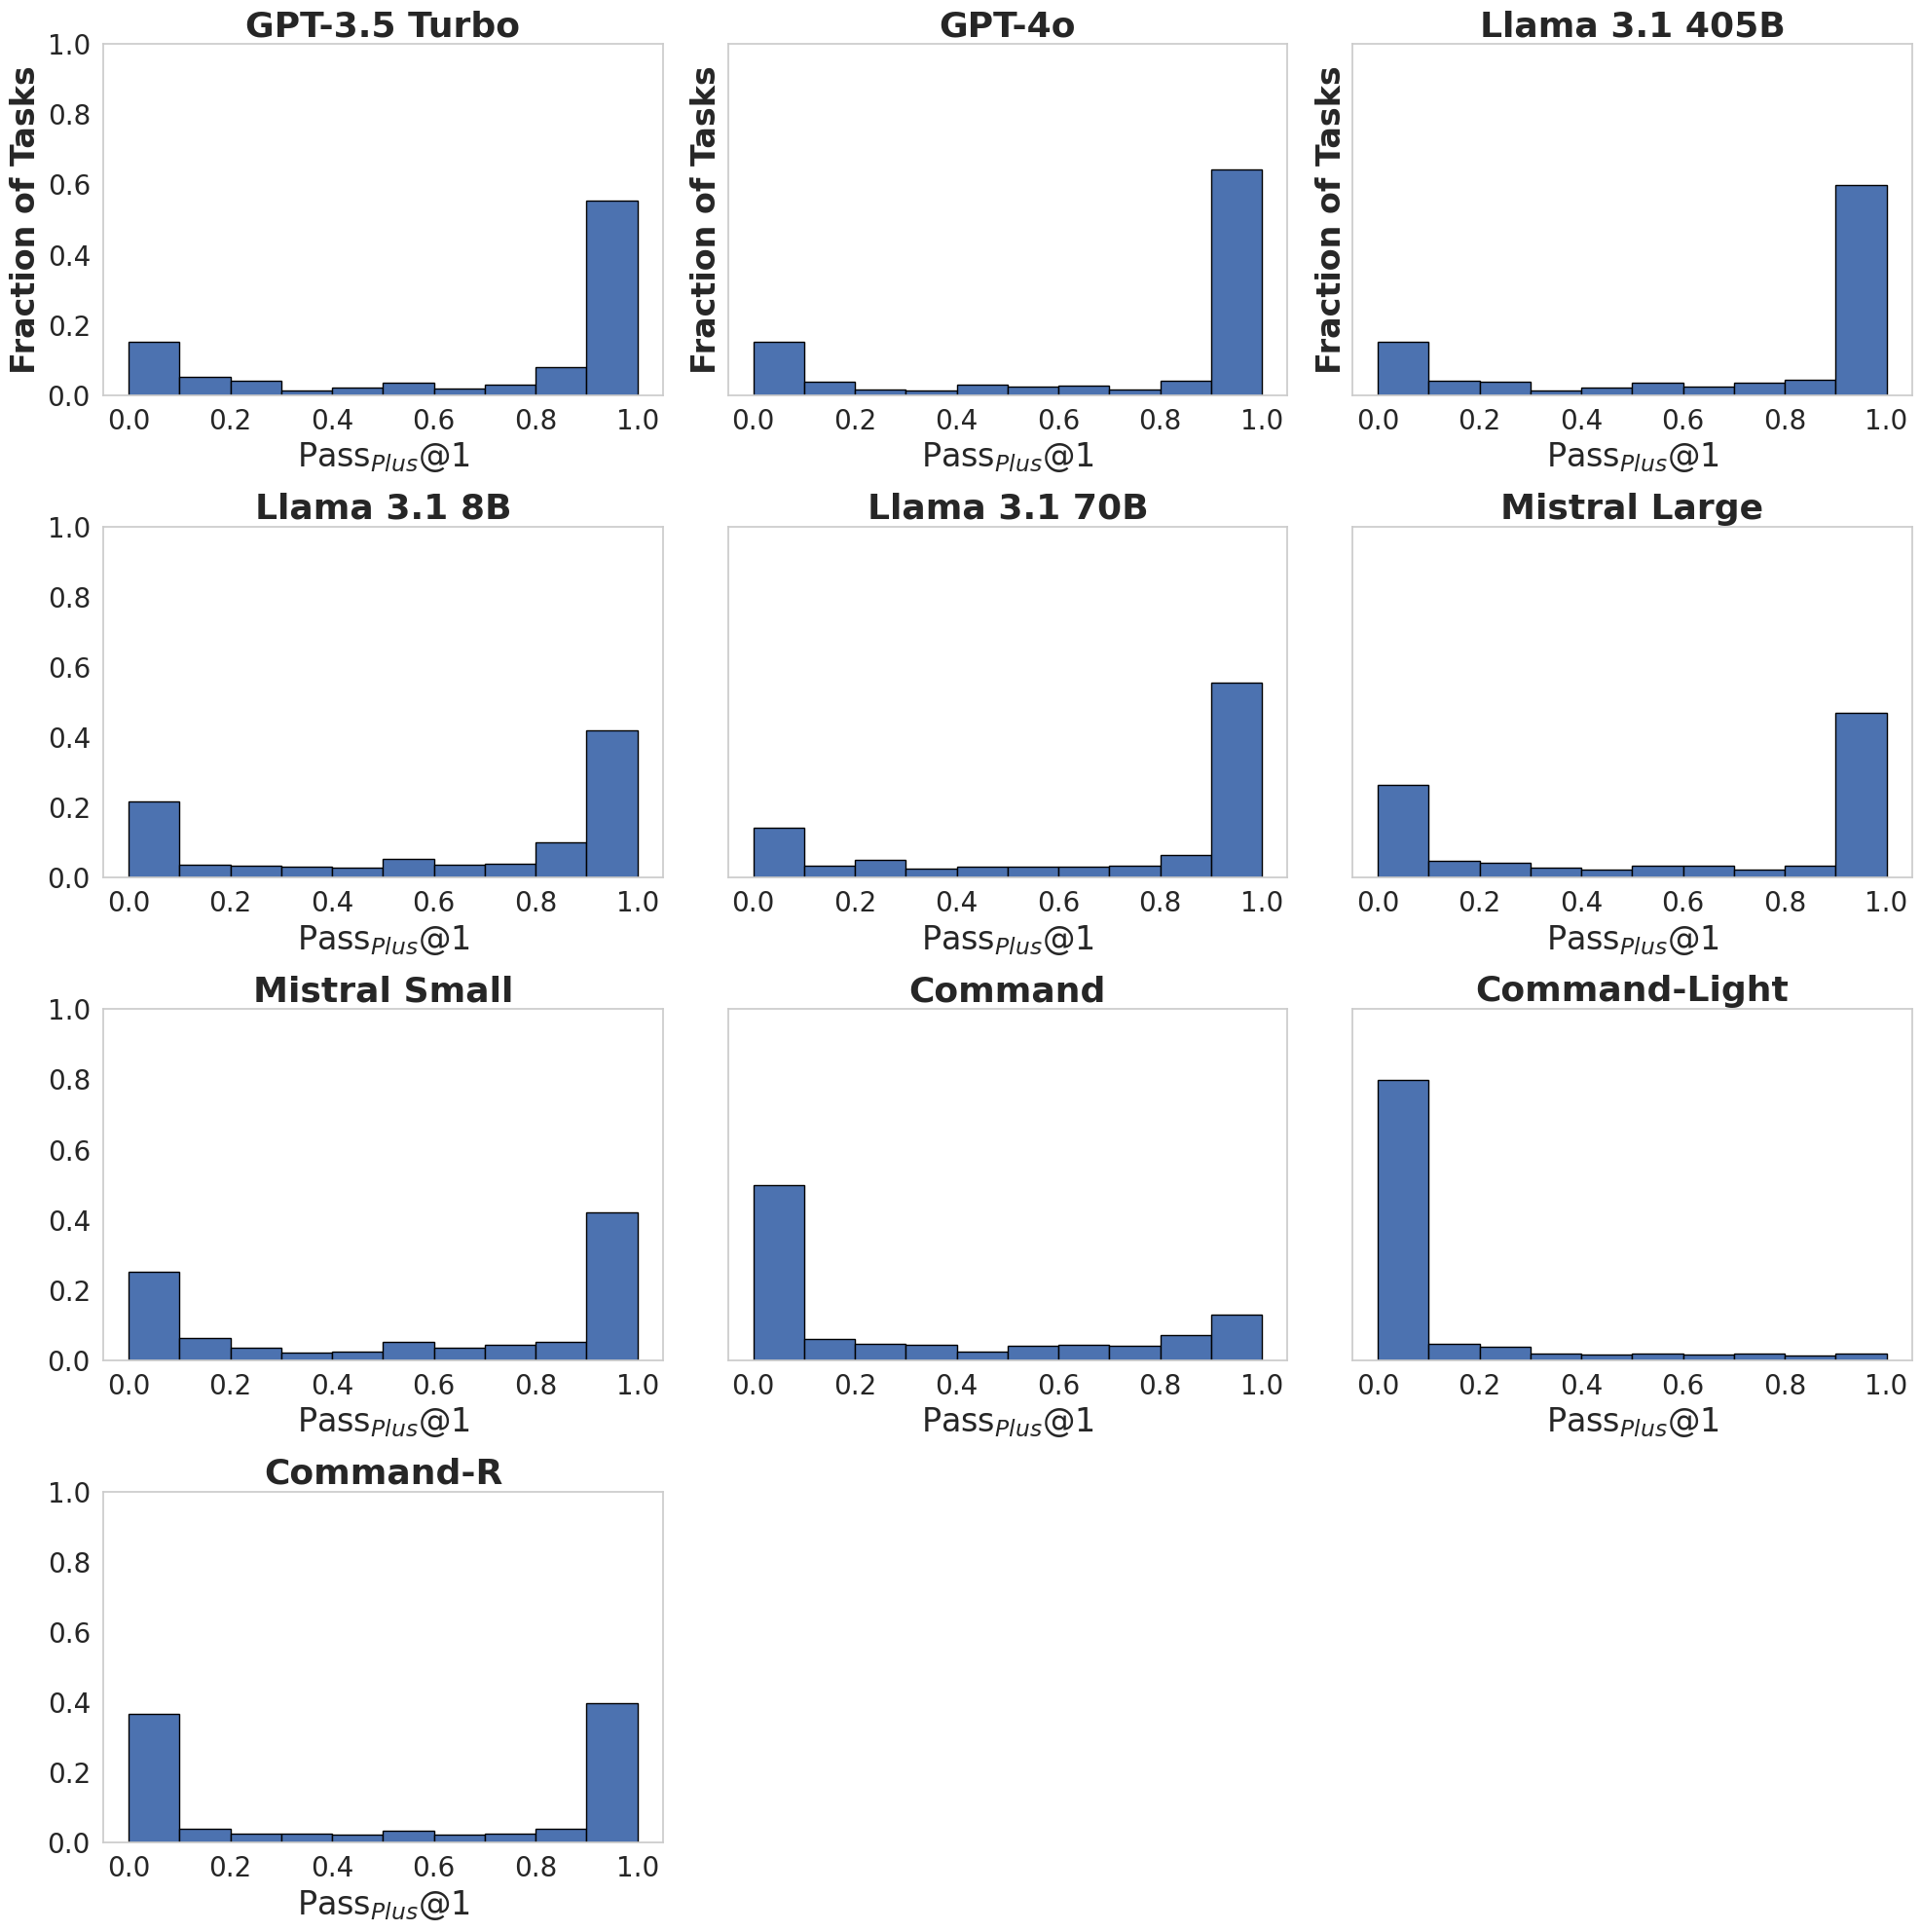

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Define the model name mapping to more readable titles
model_titles = {
    'gpt-35-turbo-16k_azure': 'GPT-3.5 Turbo',
    'Meta-Llama-3-1-8B-Instruct-nwxcg_azure': 'Llama 3.1 8B',
    'Meta-Llama-3-1-70B-Instruct-htzs_azure': 'Llama 3.1 70B',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'Mistral-large-ygkys_azure': 'Mistral Large',
    'Mistral-small-zgjes_azure': 'Mistral Small',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'command-r_cohere': 'Command-R',
    'gpt-4o_azure': 'GPT-4o'
}

# Get the unique models from the dataframe
unique_models = df['model'].unique()

# Set up the grid size based on the number of models
n_cols = 3
n_rows = -(-len(unique_models) // n_cols)  # Ceiling division to determine rows needed

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharey=True)
axes = axes.flatten()

# Loop through each model and create a histogram
for i, model in enumerate(unique_models):
    ax = axes[i]
    filtered_data = df[df['model'] == model]
    weights = [1 / len(filtered_data)] * len(filtered_data)
    
    ax.hist(filtered_data['pass_plus_rate'], bins=10, weights=weights, edgecolor='black')
    ax.set_title(model_titles.get(model, model), fontsize=26, weight='bold')
    ax.set_xlabel(r'$\text{Pass}_{Plus}@1$', fontsize=24)
    ax.grid(False)
    ax.set_ylim(0, 1)
    
    # change font size of ticks
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the ylabel for the first column
for ax in axes[:n_cols]:
    ax.set_ylabel('Fraction of Tasks', fontsize=24, weight='bold')

# Hide any empty subplots
for j in range(len(unique_models), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('figs/diff_mbpp.png', dpi=300)
plt.show()


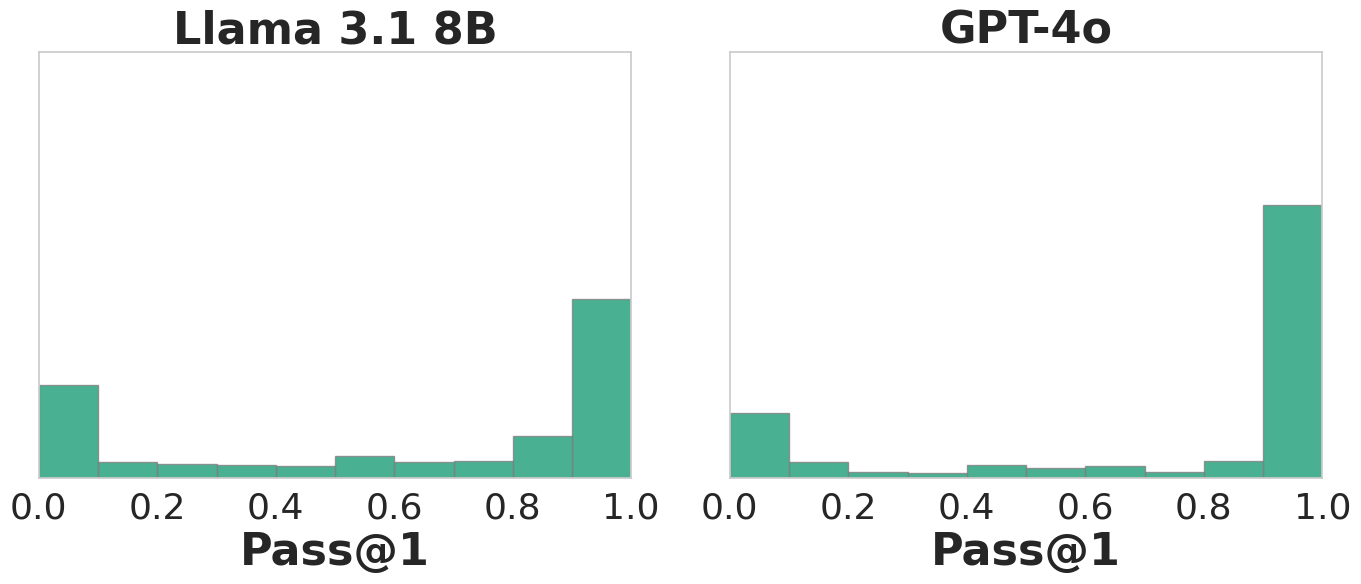

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style='whitegrid')
colors = sns.color_palette("Dark2", n_colors=len(unique_models))

# Define the model name mapping to more readable titles
model_titles = {
    'gpt-35-turbo-16k_azure': 'GPT-3.5 Turbo',
    'Meta-Llama-3-1-8B-Instruct-nwxcg_azure': 'Llama 3.1 8B',
    'Meta-Llama-3-1-70B-Instruct-htzs_azure': 'Llama 3.1 70B',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'Mistral-large-ygkys_azure': 'Mistral Large',
    'Mistral-small-zgjes_azure': 'Mistral Small',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'command-r_cohere': 'Command-R',
    'gpt-4o_azure': 'GPT-4o'
}

# Define the models to plot
unique_models = ["Meta-Llama-3-1-8B-Instruct-nwxcg_azure", "gpt-4o_azure"]

# Set up the grid size based on the number of models
n_cols = 2
n_rows = 1

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharey=True)
axes = axes.flatten()

# Loop through each model and create a histogram
for i, model in enumerate(unique_models):
    ax = axes[i]
    filtered_data = df[df['model'] == model]
    weights = [1 / len(filtered_data)] * len(filtered_data)  # Equal weight for each task and sum to 1
    
    ax.hist(filtered_data['pass_plus_rate'], bins=10, weights=weights, 
            edgecolor='gray', color=colors[0], alpha=0.8)
    ax.set_title(model_titles.get(model, model), fontsize=32, weight='bold')
    ax.set_xlabel("Pass@1", fontsize=32, weight='bold')
    ax.grid(False)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)

    # hide y-axis ticks
    ax.yaxis.set_visible(False)
    
    # Change font size of ticks
    ax.tick_params(axis='both', which='major', labelsize=26)

# Hide any empty subplots
for j in range(len(unique_models), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Scatterplots

/tmp/ipykernel_3434135/2195537663.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',


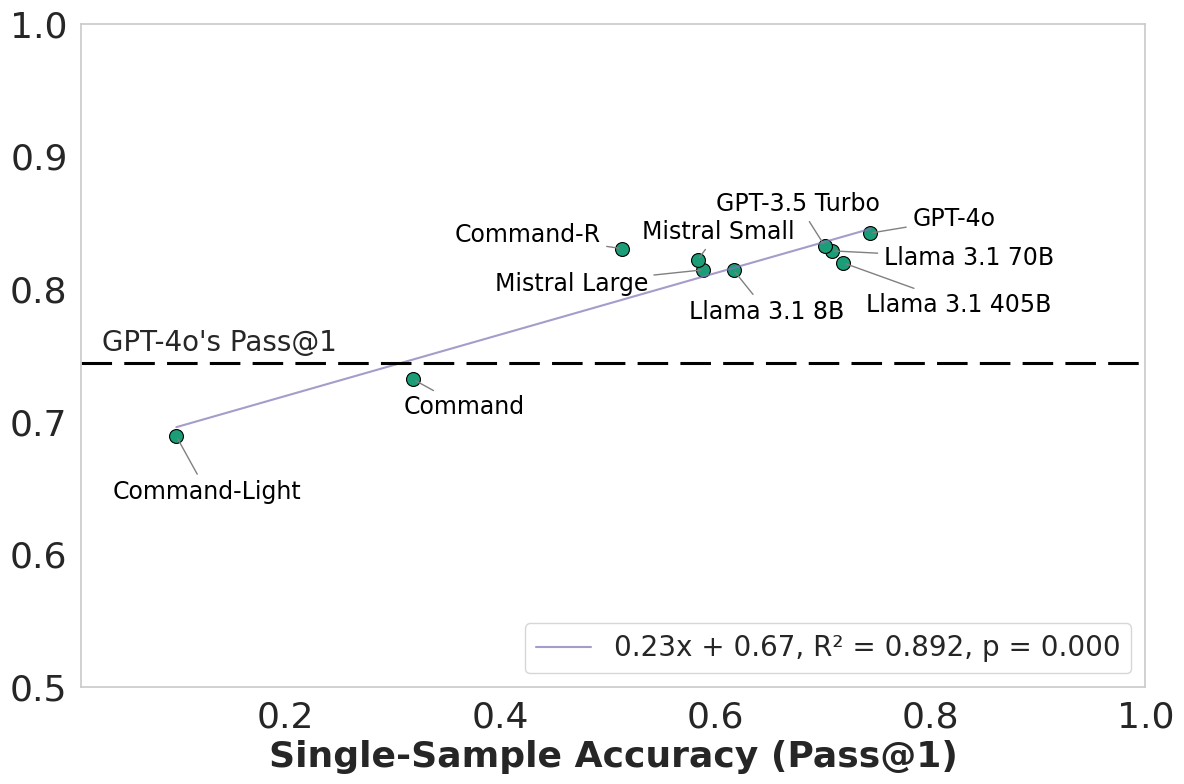

In [40]:
# drop column key
df_grouped = df.drop(columns=['key'])

df_grouped = df_grouped.groupby('model').mean().reset_index()

# Create a new column for color coding
df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'GPT-4o' if 'gpt-4o_azure' in x else 'Others')

gpt_4o_rate = df_grouped[df_grouped['color_group'] == 'GPT-4o']['pass_plus_rate'].values[0]

model_name_mapping = {
    'gpt-35-turbo-16k_azure': 'GPT-3.5 Turbo',
    'Meta-Llama-3-1-8B-Instruct-nwxcg_azure': 'Llama 3.1 8B',
    'Meta-Llama-3-1-70B-Instruct-htzs_azure': 'Llama 3.1 70B',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'Mistral-large-ygkys_azure': 'Mistral Large',
    'Mistral-small-zgjes_azure': 'Mistral Small',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'command-r_cohere': 'Command-R',
    'gpt-4o_azure': 'GPT-4o'
}

# Apply the mapping to the model column
df_grouped['model'] = df_grouped['model'].map(model_name_mapping)

# Fit power law and linear models
popt_linear, _ = curve_fit(lambda x, m, b: m*x + b, df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Generate points for the fitted curves
x_fit = np.linspace(df_grouped['pass_plus_rate'].min(), df_grouped['pass_plus_rate'].max(), 100)
y_fit_linear = popt_linear[0] * x_fit + popt_linear[1]

# Calculate R-squared values
r2_linear = r2_score(df_grouped['pass_plus_given_base'], popt_linear[0] * df_grouped['pass_plus_rate'] + popt_linear[1])

# Perform linear regression to get the p-value
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Set the Seaborn style and Dark2 color palette
sns.set(style="whitegrid", palette="Dark2")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',
                           palette="Dark2", s=100, edgecolor='black', legend='full')

# Add the linear fit line
plt.plot(x_fit, y_fit_linear, 'm-', label=f'{popt_linear[0]:.2f}x + {popt_linear[1]:.2f}, R² = {r2_linear:.3f}, p = {p_value:.3f}', alpha=0.7, linewidth=1.5)

plt.xlim(0.01, 1)
plt.ylim(0, 1)

# Add horizontal line for GPT-4o pass_plus_rate
plt.axhline(y=gpt_4o_rate, linestyle='dashed', linewidth=2.2, dashes=(10, 4), alpha=1, color='black')
plt.text(0.03, gpt_4o_rate+0.015, "GPT-4o's Pass@1", 
         verticalalignment='center', fontsize=20)

# Add annotations to each point (optional, may clutter the plot if too many points)
for i in range(len(df_grouped)):
    model = df_grouped.iloc[i]['model']
    pass_plus_rate = df_grouped.iloc[i]['pass_plus_rate']
    pass_plus_given_base = df_grouped.iloc[i]['pass_plus_given_base']
    line = False
    if model == 'CodeGen2':
        xytext = (5, 20)
        line = True
    elif model == 'CodeGen':
        xytext = (40, 25)
        line = True
    elif model == 'Command':
        xytext = (80, -20)
        line = True
    elif model == 'Command-Light':
        xytext = (90, -40)
        line = True
    elif model == 'Code Llama 13B':
        xytext = (150, -5)
        line = False
    elif model == 'Code Llama 7B':
        xytext = (115, -15)
        line = False
    elif model == 'CodeT5p 16B':
        xytext = (100, -45)
        line = True
    elif model == 'StarCoder':
        xytext = (-30, 5)
        line = True
    elif model == 'Mistral Small':
        xytext = (70, 20)
        line = True
    elif model == 'Mistral Large':
        xytext = (-40, -10)
        line = True
    elif model == 'Phi-3 Medium':
        xytext = (100, -20)
        line = True
    elif model == 'Phi-3 Mini':
        xytext = (20, 20)
        line = True
    elif model == 'Llama 3.1 8B':
        xytext = (80, -30)
        line = True
    elif model == 'Llama 3.1 70B':
        xytext = (160, -5)
        line = True
    elif model == 'Llama 3.1 405B':
        xytext = (150, -30)
        line = True
    elif model == 'GPT-3.5 Turbo':
        xytext = (40, 30)
        line = True
    elif model == 'Command-R':
        xytext = (-15, 10)
        line = True
    else:
        xytext = (90, 10)
        line = True
    if line:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray'))
    else:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray', alpha=0.))

# Customize the legend
plt.legend(loc='lower right', fontsize=20)


plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(False)
plt.ylim(0.5, 1)

# Add labels and title
plt.xlabel("Single-Sample Accuracy (Pass@1)", fontsize=26, weight='bold')
plt.ylabel(r'', fontsize=22)

# Adjust the layout to make it more professional
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('figs/mbpp.png', dpi=300)

# Show the plot
plt.show()

/tmp/ipykernel_3434135/2538284313.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',


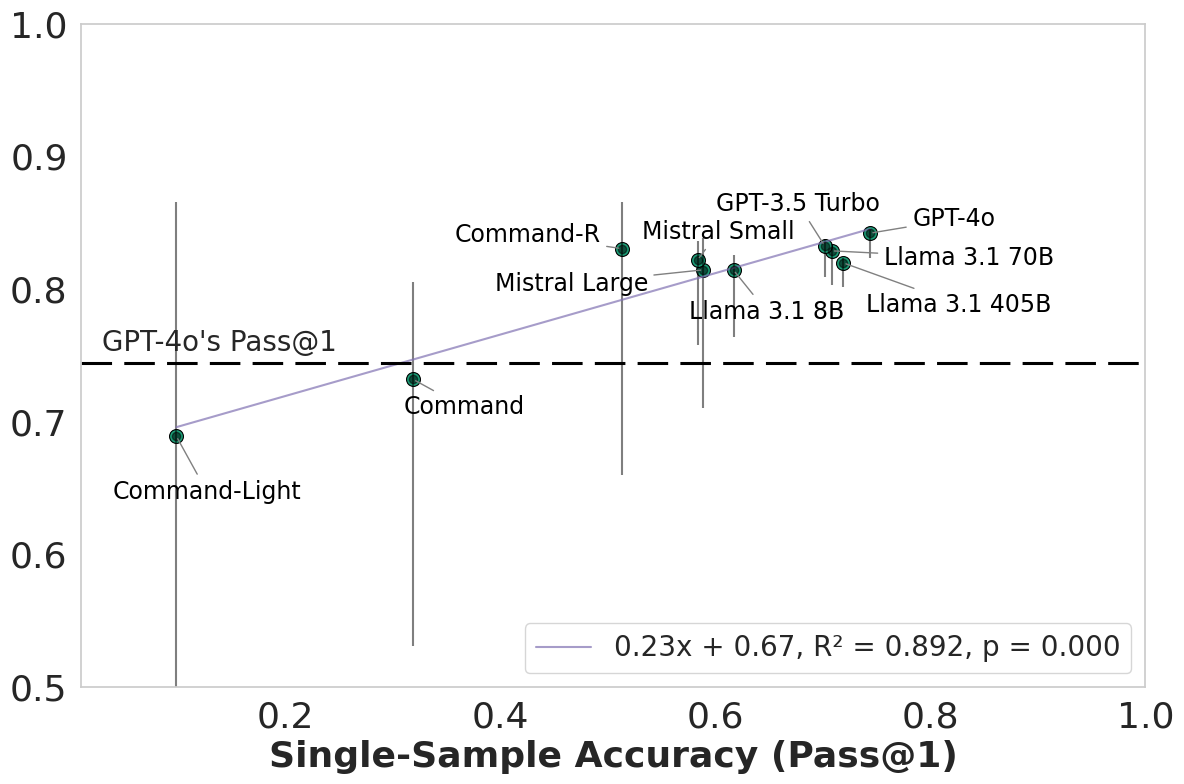

In [39]:
# drop column key
df_grouped = df.drop(columns=['key'])

df_grouped = df_grouped.groupby('model').mean().reset_index()

# Create a new column for color coding
df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'GPT-4o' if 'gpt-4o_azure' in x else 'Others')

gpt_4o_rate = df_grouped[df_grouped['color_group'] == 'GPT-4o']['pass_plus_rate'].values[0]

model_name_mapping = {
    'gpt-35-turbo-16k_azure': 'GPT-3.5 Turbo',
    'Meta-Llama-3-1-8B-Instruct-nwxcg_azure': 'Llama 3.1 8B',
    'Meta-Llama-3-1-70B-Instruct-htzs_azure': 'Llama 3.1 70B',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'Mistral-large-ygkys_azure': 'Mistral Large',
    'Mistral-small-zgjes_azure': 'Mistral Small',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'command-r_cohere': 'Command-R',
    'gpt-4o_azure': 'GPT-4o'
}

# Apply the mapping to the model column
df_grouped['model'] = df_grouped['model'].map(model_name_mapping)

# Fit power law and linear models
popt_linear, _ = curve_fit(lambda x, m, b: m*x + b, df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Generate points for the fitted curves
x_fit = np.linspace(df_grouped['pass_plus_rate'].min(), df_grouped['pass_plus_rate'].max(), 100)
y_fit_linear = popt_linear[0] * x_fit + popt_linear[1]

# Calculate R-squared values
r2_linear = r2_score(df_grouped['pass_plus_given_base'], popt_linear[0] * df_grouped['pass_plus_rate'] + popt_linear[1])

# Perform linear regression to get the p-value
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Set the Seaborn style and Dark2 color palette
sns.set(style="whitegrid", palette="Dark2")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',
                           palette="Dark2", s=100, edgecolor='black', legend='full')

# add error bars
plt.errorbar(df_grouped['pass_plus_rate'], 
             df_grouped['pass_plus_given_base'], 
             yerr=[df_grouped['pass_plus_given_base'] - df_grouped['pass_plus_given_base_worst'], df_grouped['pass_plus_given_base_best'] - df_grouped['pass_plus_given_base']], 
             fmt='o', color='black', alpha=0.5)

# Add the linear fit line
plt.plot(x_fit, y_fit_linear, 'm-', label=f'{popt_linear[0]:.2f}x + {popt_linear[1]:.2f}, R² = {r2_linear:.3f}, p = {p_value:.3f}', alpha=0.7, linewidth=1.5)

plt.xlim(0.01, 1)
plt.ylim(0, 1)

# Add horizontal line for GPT-4o pass_plus_rate
plt.axhline(y=gpt_4o_rate, linestyle='dashed', linewidth=2.2, dashes=(10, 4), alpha=1, color='black')
plt.text(0.03, gpt_4o_rate+0.015, "GPT-4o's Pass@1", 
         verticalalignment='center', fontsize=20)

# Add annotations to each point (optional, may clutter the plot if too many points)
for i in range(len(df_grouped)):
    model = df_grouped.iloc[i]['model']
    pass_plus_rate = df_grouped.iloc[i]['pass_plus_rate']
    pass_plus_given_base = df_grouped.iloc[i]['pass_plus_given_base']
    line = False
    if model == 'CodeGen2':
        xytext = (5, 20)
        line = True
    elif model == 'CodeGen':
        xytext = (40, 25)
        line = True
    elif model == 'Command':
        xytext = (80, -20)
        line = True
    elif model == 'Command-Light':
        xytext = (90, -40)
        line = True
    elif model == 'Code Llama 13B':
        xytext = (150, -5)
        line = False
    elif model == 'Code Llama 7B':
        xytext = (115, -15)
        line = False
    elif model == 'CodeT5p 16B':
        xytext = (100, -45)
        line = True
    elif model == 'StarCoder':
        xytext = (-30, 5)
        line = True
    elif model == 'Mistral Small':
        xytext = (70, 20)
        line = True
    elif model == 'Mistral Large':
        xytext = (-40, -10)
        line = True
    elif model == 'Phi-3 Medium':
        xytext = (100, -20)
        line = True
    elif model == 'Phi-3 Mini':
        xytext = (20, 20)
        line = True
    elif model == 'Llama 3.1 8B':
        xytext = (80, -30)
        line = True
    elif model == 'Llama 3.1 70B':
        xytext = (160, -5)
        line = True
    elif model == 'Llama 3.1 405B':
        xytext = (150, -30)
        line = True
    elif model == 'GPT-3.5 Turbo':
        xytext = (40, 30)
        line = True
    elif model == 'Command-R':
        xytext = (-15, 10)
        line = True
    else:
        xytext = (90, 10)
        line = True
    if line:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray'))
    else:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray', alpha=0.))

# Customize the legend
plt.legend(loc='lower right', fontsize=20)


plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(False)
plt.ylim(0.5, 1)

# Add labels and title
plt.xlabel("Single-Sample Accuracy (Pass@1)", fontsize=26, weight='bold')
plt.ylabel(r'', fontsize=22)

# Adjust the layout to make it more professional
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('figs/mbpp_err_bars.png', dpi=300)

# Show the plot
plt.show()

/tmp/ipykernel_3434135/1834376326.py:52: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',


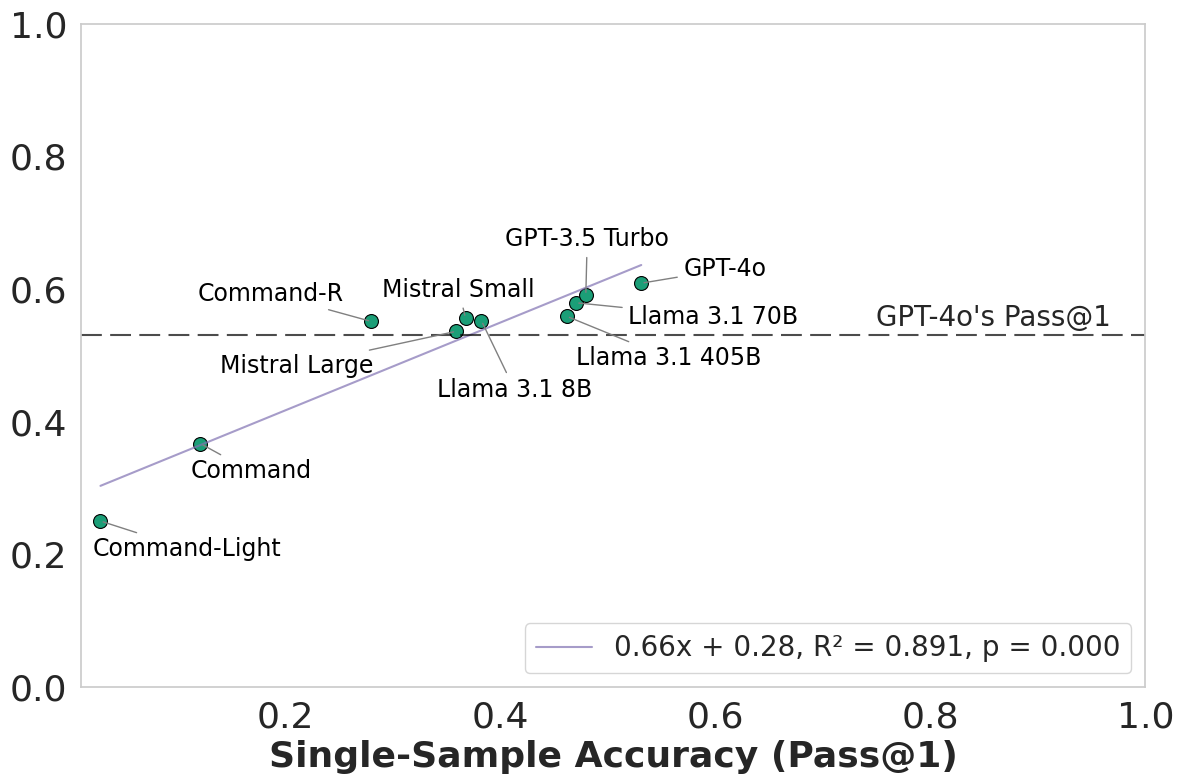

In [ ]:
df_temp = df.drop(columns=['model']).groupby('key').mean().reset_index()

top_tasks = df_temp[(df_temp['pass_plus_given_base']>=0) & (df_temp['pass_plus_given_base']<0.9)].sort_values('pass_plus_given_base', ascending=True).key.tolist()

df_grouped = df[df['key'].isin(top_tasks)]

# drop column key
df_grouped = df_grouped.drop(columns=['key'])

df_grouped = df_grouped.groupby('model').mean().reset_index()

# Create a new column for color coding
df_grouped['color_group'] = df_grouped['model'].apply(lambda x: 'GPT-4o' if 'gpt-4o_azure' in x else 'Others')

gpt_4o_rate = df_grouped[df_grouped['color_group'] == 'GPT-4o']['pass_plus_rate'].values[0]

model_name_mapping = {
    'gpt-35-turbo-16k_azure': 'GPT-3.5 Turbo',
    'Meta-Llama-3-1-8B-Instruct-nwxcg_azure': 'Llama 3.1 8B',
    'Meta-Llama-3-1-70B-Instruct-htzs_azure': 'Llama 3.1 70B',
    'meta-llama--Meta-Llama-3.1-405B-Instruct-Turbo_together': 'Llama 3.1 405B',
    'Mistral-large-ygkys_azure': 'Mistral Large',
    'Mistral-small-zgjes_azure': 'Mistral Small',
    'command_cohere': 'Command',
    'command-light_cohere': 'Command-Light',
    'command-r_cohere': 'Command-R',
    'gpt-4o_azure': 'GPT-4o'
}

# Apply the mapping to the model column
df_grouped['model'] = df_grouped['model'].map(model_name_mapping)

# Fit power law and linear models
popt_linear, _ = curve_fit(lambda x, m, b: m*x + b, df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Generate points for the fitted curves
x_fit = np.linspace(df_grouped['pass_plus_rate'].min(), df_grouped['pass_plus_rate'].max(), 100)
y_fit_linear = popt_linear[0] * x_fit + popt_linear[1]

# Calculate R-squared values
r2_linear = r2_score(df_grouped['pass_plus_given_base'], popt_linear[0] * df_grouped['pass_plus_rate'] + popt_linear[1])

# Perform linear regression to get the p-value
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['pass_plus_rate'], df_grouped['pass_plus_given_base'])

# Set the Seaborn style and Dark2 color palette
sns.set(style="whitegrid", palette="Dark2")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_grouped, x='pass_plus_rate', y='pass_plus_given_base',
                           palette="Dark2", s=100, edgecolor='black', legend='full')

# Add the linear fit line
plt.plot(x_fit, y_fit_linear, 'm-', label=f'{popt_linear[0]:.2f}x + {popt_linear[1]:.2f}, R² = {r2_linear:.3f}, p = {p_value:.3f}', alpha=0.7, linewidth=1.5)

plt.xlim(0.01, 1)
plt.ylim(0, 1)

# Add horizontal line for GPT-4o pass_plus_rate
plt.axhline(y=gpt_4o_rate, linestyle='dashed', linewidth=1.5, dashes=(10, 4), alpha=0.7, color='black')
plt.text(0.75, gpt_4o_rate+0.025, "GPT-4o's Pass@1", 
         verticalalignment='center', fontsize=20)


# Add annotations to each point (optional, may clutter the plot if too many points)
for i in range(len(df_grouped)):
    model = df_grouped.iloc[i]['model']
    pass_plus_rate = df_grouped.iloc[i]['pass_plus_rate']
    pass_plus_given_base = df_grouped.iloc[i]['pass_plus_given_base']
    line = False
    if model == 'CodeGen2':
        xytext = (5, 20)
        line = True
    elif model == 'CodeGen':
        xytext = (40, 25)
        line = True
    elif model == 'Command':
        xytext = (80, -20)
        line = True
    elif model == 'Command-Light':
        xytext = (130, -20)
        line = True
    elif model == 'Code Llama 13B':
        xytext = (150, -5)
        line = False
    elif model == 'Code Llama 7B':
        xytext = (115, -15)
        line = False
    elif model == 'CodeT5p 16B':
        xytext = (100, -45)
        line = True
    elif model == 'StarCoder':
        xytext = (-30, 5)
        line = True
    elif model == 'Mistral Small':
        xytext = (50, 20)
        line = True
    elif model == 'Mistral Large':
        xytext = (-60, -25)
        line = True
    elif model == 'Phi-3 Medium':
        xytext = (100, -20)
        line = True
    elif model == 'Phi-3 Mini':
        xytext = (20, 20)
        line = True
    elif model == 'Llama 3.1 8B':
        xytext = (80, -50)
        line = True
    elif model == 'Llama 3.1 70B':
        xytext = (160, -10)
        line = True
    elif model == 'Llama 3.1 405B':
        xytext = (140, -30)
        line = True
    elif model == 'GPT-3.5 Turbo':
        xytext = (60, 40)
        line = True
    elif model == 'Command-R':
        xytext = (-20, 20)
        line = True
    else:
        xytext = (90, 10)
        line = True
    if line:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray'))
    else:
        scatter.annotate(model, xy=(pass_plus_rate, pass_plus_given_base), xycoords='data',
                          xytext=xytext, textcoords='offset points',
                          size=17, ha='right', va='center', color='black',
                          arrowprops=dict(arrowstyle="-", color='gray', alpha=0.))

# Customize the legend
plt.legend(loc='lower right', fontsize=20)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(False)
plt.ylim(0, 1)

# Add labels and title
plt.xlabel("Single-Sample Accuracy (Pass@1)", fontsize=26, weight='bold')
plt.ylabel(r'', fontsize=22)

# Adjust the layout to make it more professional
plt.tight_layout()

# Save the figure in high resolution
plt.savefig('fig/mbpp_full_axis.png', dpi=300)

# Show the plot
plt.show()